#**IMPORTING LIBRARIES**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


#**IMPORTING DATA SET**

In [3]:
train_data = pd.read_csv("/content/drive/MyDrive/ML_Project/train_data.csv")
test_data = pd.read_csv("/content/drive/MyDrive/ML_Project/test_data.csv")
test_train_merged=pd.concat([train_data,test_data])

#**OVERVIEW OF TRAIN DATASET**

SIZE OF DATASET

In [4]:
format(train_data.shape)

'(184506, 122)'

DESCRIPTION OF DATA

In [5]:
train_data.describe()

SK_ID_CURR   CNT_CHILDREN  AMT_INCOME_TOTAL    AMT_CREDIT  \
count  184506.000000  184506.000000      1.845060e+05  1.845060e+05   
mean   278031.658488       0.416463      1.689985e+05  5.992854e+05   
std    102789.553650       0.719614      2.942453e+05  4.021982e+05   
min    100003.000000       0.000000      2.610000e+04  4.500000e+04   
25%    188904.250000       0.000000      1.125000e+05  2.700000e+05   
50%    277948.500000       0.000000      1.485000e+05  5.155290e+05   
75%    367083.250000       1.000000      2.025000e+05  8.086500e+05   
max    456254.000000      19.000000      1.170000e+08  4.050000e+06   

         AMT_ANNUITY  AMT_GOODS_PRICE  REGION_POPULATION_RELATIVE  \
count  184500.000000     1.843390e+05               184506.000000   
mean    27114.455805     5.386926e+05                    0.020868   
std     14468.652072     3.692263e+05                    0.013818   
min      1615.500000     4.050000e+04                    0.000290   
25%     16555.500000     2.385000e+05                    0.010006   
50%     24939.000000     4.500000e+05                    0.018850   
75%     34596.000000     6.795000e+05                    0.028663   
max    258025.500000     4.050000e+06                    0.072508   

          DAYS_BIRTH  DAYS_EMPLOYED  DAYS_REGISTRATION  ...  FLAG_DOCUMENT_19  \
count  184506.000000  184506.000000       184506.00000  ...     184506.000000   
mean   -16036.718307   63838.583271        -4984.89506  ...          0.000629   
std      4361.484692  141295.297588         3524.99741  ...          0.025066   
min    -25201.000000  -17912.000000       -23416.00000  ...          0.000000   
25%    -19677.000000   -2757.000000        -7486.00000  ...          0.000000   
50%    -15747.000000   -1211.000000        -4506.00000  ...          0.000000   
75%    -12416.000000    -289.000000        -2000.00000  ...          0.000000   
max     -7489.000000  365243.000000            0.00000  ...          1.000000   

       FLAG_DOCUMENT_20  FLAG_DOCUMENT_21  AMT_REQ_CREDIT_BUREAU_HOUR  \
count     184506.000000     184506.000000               159508.000000   
mean           0.000553          0.000325                    0.006338   
std            0.023506          0.018030                    0.083743   
min            0.000000          0.000000                    0.000000   
25%            0.000000          0.000000                    0.000000   
50%            0.000000          0.000000                    0.000000   
75%            0.000000          0.000000                    0.000000   
max            1.000000          1.000000                    4.000000   

       AMT_REQ_CREDIT_BUREAU_DAY  AMT_REQ_CREDIT_BUREAU_WEEK  \
count              159508.000000               159508.000000   
mean                    0.007335                    0.034400   
std                     0.114671                    0.204187   
min                     0.000000                    0.000000   
25%                     0.000000                    0.000000   
50%                     0.000000                    0.000000   
75%                     0.000000                    0.000000   
max                     9.000000                    7.000000   

       AMT_REQ_CREDIT_BUREAU_MON  AMT_REQ_CREDIT_BUREAU_QRT  \
count              159508.000000              159508.000000   
mean                    0.267247                   0.266770   
std                     0.919465                   0.894563   
min                     0.000000                   0.000000   
25%                     0.000000                   0.000000   
50%                     0.000000                   0.000000   
75%                     0.000000                   0.000000   
max                    24.000000                 261.000000   

       AMT_REQ_CREDIT_BUREAU_YEAR         TARGET  
count               159508.000000  184506.000000  
mean                     1.897504       0.080729  
std                      1.864439       0.272419  
min        

ROWS OF DATA

In [6]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 184506 entries, 0 to 184505
Columns: 122 entries, SK_ID_CURR to TARGET
dtypes: float64(65), int64(41), object(16)
memory usage: 171.7+ MB


COLUMNS OF DATA

In [7]:
train_data.columns

Index(['SK_ID_CURR', 'NAME_CONTRACT_TYPE', 'CODE_GENDER', 'FLAG_OWN_CAR',
       'FLAG_OWN_REALTY', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL', 'AMT_CREDIT',
       'AMT_ANNUITY', 'AMT_GOODS_PRICE',
       ...
       'FLAG_DOCUMENT_19', 'FLAG_DOCUMENT_20', 'FLAG_DOCUMENT_21',
       'AMT_REQ_CREDIT_BUREAU_HOUR', 'AMT_REQ_CREDIT_BUREAU_DAY',
       'AMT_REQ_CREDIT_BUREAU_WEEK', 'AMT_REQ_CREDIT_BUREAU_MON',
       'AMT_REQ_CREDIT_BUREAU_QRT', 'AMT_REQ_CREDIT_BUREAU_YEAR', 'TARGET'],
      dtype='object', length=122)

FIRST FIVE ROWS OF DATA

In [8]:
train_data.head()


SK_ID_CURR NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR FLAG_OWN_REALTY  \
0      450407         Cash loans           F            N               Y   
1      271298         Cash loans           M            Y               Y   
2      122238         Cash loans           M            Y               Y   
3      305311         Cash loans           M            N               N   
4      414121         Cash loans           F            N               Y   

   CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  AMT_GOODS_PRICE  \
0             1           67500.0    227520.0      11065.5         180000.0   
1             1          247500.0   1882372.5      65560.5        1719000.0   
2             1          180000.0    101880.0      10827.0          90000.0   
3             0           81000.0    405000.0      20677.5         405000.0   
4             0          157500.0    888840.0      29506.5         675000.0   

   ... FLAG_DOCUMENT_19 FLAG_DOCUMENT_20 FLAG_DOCUMENT_21  \
0  ...                0                0                0   
1  ...                0                0                0   
2  ...                0                0                0   
3  ...                0                0                0   
4  ...                0                0                0   

  AMT_REQ_CREDIT_BUREAU_HOUR AMT_REQ_CREDIT_BUREAU_DAY  \
0                        0.0                       0.0   
1                        0.0                       0.0   
2                        0.0                       0.0   
3                        0.0                       0.0   
4                        0.0                       0.0   

   AMT_REQ_CREDIT_BUREAU_WEEK  AMT_REQ_CREDIT_BUREAU_MON  \
0                         0.0                        1.0   
1                         0.0                        0.0   
2                         0.0                        2.0   
3                         0.0                        0.0   
4                         0.0                        0.0   

   AMT_REQ_CREDIT_BUREAU_QRT  AMT_REQ_CREDIT_BUREAU_YEAR  TARGET  
0                        0.0                         2.0       0  
1                        1.0                         3.0       0  
2                        0.0                         1.0       0  
3                        0.0                         2.0       0  
4                        0.0                         2.0       0  

[5 rows x 122 columns]

In [9]:
train=train_data.drop(columns=['SK_ID_CURR'])

Column which shows ID is not at all relevant in our model. So dropping that column.

In [10]:
train.head()

NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR FLAG_OWN_REALTY  CNT_CHILDREN  \
0         Cash loans           F            N               Y             1   
1         Cash loans           M            Y               Y             1   
2         Cash loans           M            Y               Y             1   
3         Cash loans           M            N               N             0   
4         Cash loans           F            N               Y             0   

   AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  AMT_GOODS_PRICE  \
0           67500.0    227520.0      11065.5         180000.0   
1          247500.0   1882372.5      65560.5        1719000.0   
2          180000.0    101880.0      10827.0          90000.0   
3           81000.0    405000.0      20677.5         405000.0   
4          157500.0    888840.0      29506.5         675000.0   

   NAME_TYPE_SUITE  ... FLAG_DOCUMENT_19 FLAG_DOCUMENT_20 FLAG_DOCUMENT_21  \
0           Family  ...                0                0                0   
1    Unaccompanied  ...                0                0                0   
2  Spouse, partner  ...                0                0                0   
3    Unaccompanied  ...                0                0                0   
4    Unaccompanied  ...                0                0                0   

  AMT_REQ_CREDIT_BUREAU_HOUR  AMT_REQ_CREDIT_BUREAU_DAY  \
0                        0.0                        0.0   
1                        0.0                        0.0   
2                        0.0                        0.0   
3                        0.0                        0.0   
4                        0.0                        0.0   

   AMT_REQ_CREDIT_BUREAU_WEEK  AMT_REQ_CREDIT_BUREAU_MON  \
0                         0.0                        1.0   
1                         0.0                        0.0   
2                         0.0                        2.0   
3                         0.0                        0.0   
4                         0.0                        0.0   

   AMT_REQ_CREDIT_BUREAU_QRT  AMT_REQ_CREDIT_BUREAU_YEAR  TARGET  
0                        0.0                         2.0       0  
1                        1.0                         3.0       0  
2                        0.0                         1.0       0  
3                        0.0                         2.0       0  
4                        0.0                         2.0       0  

[5 rows x 121 columns]

In [11]:
pd.set_option('display.max_rows',None)    #pd by default shows only 10 rows, this will change it to maximum possible rows

UNIQUE VALUES

In [12]:
train.nunique().sort_values()

FLAG_DOCUMENT_12                    1
NAME_CONTRACT_TYPE                  2
LIVE_REGION_NOT_WORK_REGION         2
REG_CITY_NOT_LIVE_CITY              2
REG_CITY_NOT_WORK_CITY              2
LIVE_CITY_NOT_WORK_CITY             2
EMERGENCYSTATE_MODE                 2
FLAG_DOCUMENT_2                     2
FLAG_DOCUMENT_3                     2
FLAG_DOCUMENT_4                     2
FLAG_DOCUMENT_5                     2
FLAG_DOCUMENT_6                     2
FLAG_DOCUMENT_7                     2
FLAG_DOCUMENT_8                     2
FLAG_DOCUMENT_9                     2
FLAG_DOCUMENT_10                    2
FLAG_DOCUMENT_11                    2
FLAG_DOCUMENT_13                    2
FLAG_DOCUMENT_14                    2
FLAG_DOCUMENT_15                    2
FLAG_DOCUMENT_16                    2
FLAG_DOCUMENT_17                    2
FLAG_DOCUMENT_18                    2
FLAG_DOCUMENT_19                    2
FLAG_DOCUMENT_20                    2
FLAG_DOCUMENT_21                    2
REG_REGION_N

#**OVERVIEW OF TEST DATASET**

SIZE OF DATASET

In [13]:
format(test_data.shape)

'(123005, 121)'

DESCRIPTION OF DATA

In [14]:
test_data.describe()

SK_ID_CURR   CNT_CHILDREN  AMT_INCOME_TOTAL    AMT_CREDIT  \
count  123005.000000  123005.000000      1.230050e+05  1.230050e+05   
mean   278403.806894       0.417934      1.684971e+05  5.986369e+05   
std    102791.121509       0.725868      1.034338e+05  4.029306e+05   
min    100002.000000       0.000000      2.565000e+04  4.500000e+04   
25%    189484.000000       0.000000      1.125000e+05  2.700000e+05   
50%    278586.000000       0.000000      1.440000e+05  5.123385e+05   
75%    367253.000000       1.000000      2.025000e+05  8.086500e+05   
max    456255.000000      19.000000      6.750000e+06  4.050000e+06   

         AMT_ANNUITY  AMT_GOODS_PRICE  REGION_POPULATION_RELATIVE  \
count  122999.000000     1.228940e+05               123005.000000   
mean    27099.750994     5.379516e+05                    0.020868   
std     14531.338692     3.697775e+05                    0.013852   
min      1980.000000     4.500000e+04                    0.000290   
25%     16501.500000     2.385000e+05                    0.010006   
50%     24853.500000     4.500000e+05                    0.018850   
75%     34596.000000     6.795000e+05                    0.028663   
max    230161.500000     4.050000e+06                    0.072508   

          DAYS_BIRTH  DAYS_EMPLOYED  DAYS_REGISTRATION  ...  FLAG_DOCUMENT_18  \
count  123005.000000  123005.000000      123005.000000  ...      123005.00000   
mean   -16037.410203   63779.740141       -4987.958213  ...           0.00852   
std      4367.759521  141247.032047        3519.730864  ...           0.09191   
min    -25229.000000  -17546.000000      -24672.000000  ...           0.00000   
25%    -19689.000000   -2764.000000       -7471.000000  ...           0.00000   
50%    -15753.000000   -1218.000000       -4501.000000  ...           0.00000   
75%    -12409.000000    -290.000000       -2028.000000  ...           0.00000   
max     -7676.000000  365243.000000           0.000000  ...           1.00000   

       FLAG_DOCUMENT_19  FLAG_DOCUMENT_20  FLAG_DOCUMENT_21  \
count     123005.000000     123005.000000     123005.000000   
mean           0.000545          0.000439          0.000350   
std            0.023332          0.020948          0.018694   
min            0.000000          0.000000          0.000000   
25%            0.000000          0.000000          0.000000   
50%            0.000000          0.000000          0.000000   
75%            0.000000          0.000000          0.000000   
max            1.000000          1.000000          1.000000   

       AMT_REQ_CREDIT_BUREAU_HOUR  AMT_REQ_CREDIT_BUREAU_DAY  \
count               106484.000000              106484.000000   
mean                     0.006499                   0.006499   
std                      0.084009                   0.104620   
min                      0.000000                   0.000000   
25%                      0.000000                   0.000000   
50%                      0.000000                   0.000000   
75%                      0.000000                   0.000000   
max                      3.000000                   9.000000   

       AMT_REQ_CREDIT_BUREAU_WEEK  AMT_REQ_CREDIT_BUREAU_MON  \
count               106484.000000              106484.000000   
mean                     0.034306                   0.267618   
std                      0.205429                   0.910795   
min                      0.000000                   0.000000   
25%                      0.000000                   0.000000   
50%                      0.000000                   0.000000   
75%                      0.000000                   0.000000   
max                      8.000000                  27.000000   

       AMT_REQ_CREDIT_BUREAU_QRT  AMT_REQ_CREDIT_BUREAU_YEAR  
count              106484.000000               106484.000000  
mean                    0.263533                    1.903676  
std                     0.613427                    1.876549  
min                     0.000000            

ROWS OF DATA

In [15]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 123005 entries, 0 to 123004
Columns: 121 entries, SK_ID_CURR to AMT_REQ_CREDIT_BUREAU_YEAR
dtypes: float64(65), int64(40), object(16)
memory usage: 113.6+ MB


COLUMNS OF DATA

In [16]:
test_data.columns

Index(['SK_ID_CURR', 'NAME_CONTRACT_TYPE', 'CODE_GENDER', 'FLAG_OWN_CAR',
       'FLAG_OWN_REALTY', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL', 'AMT_CREDIT',
       'AMT_ANNUITY', 'AMT_GOODS_PRICE',
       ...
       'FLAG_DOCUMENT_18', 'FLAG_DOCUMENT_19', 'FLAG_DOCUMENT_20',
       'FLAG_DOCUMENT_21', 'AMT_REQ_CREDIT_BUREAU_HOUR',
       'AMT_REQ_CREDIT_BUREAU_DAY', 'AMT_REQ_CREDIT_BUREAU_WEEK',
       'AMT_REQ_CREDIT_BUREAU_MON', 'AMT_REQ_CREDIT_BUREAU_QRT',
       'AMT_REQ_CREDIT_BUREAU_YEAR'],
      dtype='object', length=121)

FIRST FIVE ROWS OF DATA

In [17]:
test_data.head()


SK_ID_CURR NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR FLAG_OWN_REALTY  \
0      367294         Cash loans           F            N               Y   
1      439847         Cash loans           F            N               Y   
2      380562         Cash loans           M            Y               N   
3      407238         Cash loans           F            N               Y   
4      239910         Cash loans           F            N               Y   

   CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  AMT_GOODS_PRICE  \
0             0          180000.0    265306.5      25317.0         252000.0   
1             0          202500.0    346500.0      21069.0         346500.0   
2             0          360000.0    545040.0      36553.5         450000.0   
3             0          135000.0    307557.0      20682.0         265500.0   
4             0          157500.0   1056447.0      31018.5         922500.0   

   ... FLAG_DOCUMENT_18 FLAG_DOCUMENT_19 FLAG_DOCUMENT_20 FLAG_DOCUMENT_21  \
0  ...                0                0                0                0   
1  ...                0                0                0                0   
2  ...                0                0                0                0   
3  ...                0                0                0                0   
4  ...                0                0                0                0   

  AMT_REQ_CREDIT_BUREAU_HOUR  AMT_REQ_CREDIT_BUREAU_DAY  \
0                        0.0                        0.0   
1                        0.0                        0.0   
2                        0.0                        0.0   
3                        0.0                        0.0   
4                        NaN                        NaN   

   AMT_REQ_CREDIT_BUREAU_WEEK  AMT_REQ_CREDIT_BUREAU_MON  \
0                         0.0                        1.0   
1                         0.0                        0.0   
2                         0.0                        0.0   
3                         1.0                        0.0   
4                         NaN                        NaN   

   AMT_REQ_CREDIT_BUREAU_QRT  AMT_REQ_CREDIT_BUREAU_YEAR  
0                        2.0                         5.0  
1                        0.0                         5.0  
2                        1.0                         5.0  
3                        1.0                         2.0  
4                        NaN                         NaN  

[5 rows x 121 columns]

In [18]:
test=test_data.drop(columns=['SK_ID_CURR'])

Column which shows ID is not at all relevant in our model. So dropping that column.

In [19]:
test.head()

NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR FLAG_OWN_REALTY  CNT_CHILDREN  \
0         Cash loans           F            N               Y             0   
1         Cash loans           F            N               Y             0   
2         Cash loans           M            Y               N             0   
3         Cash loans           F            N               Y             0   
4         Cash loans           F            N               Y             0   

   AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  AMT_GOODS_PRICE NAME_TYPE_SUITE  \
0          180000.0    265306.5      25317.0         252000.0   Unaccompanied   
1          202500.0    346500.0      21069.0         346500.0   Unaccompanied   
2          360000.0    545040.0      36553.5         450000.0   Unaccompanied   
3          135000.0    307557.0      20682.0         265500.0   Unaccompanied   
4          157500.0   1056447.0      31018.5         922500.0          Family   

   ... FLAG_DOCUMENT_18 FLAG_DOCUMENT_19 FLAG_DOCUMENT_20 FLAG_DOCUMENT_21  \
0  ...                0                0                0                0   
1  ...                0                0                0                0   
2  ...                0                0                0                0   
3  ...                0                0                0                0   
4  ...                0                0                0                0   

   AMT_REQ_CREDIT_BUREAU_HOUR  AMT_REQ_CREDIT_BUREAU_DAY  \
0                         0.0                        0.0   
1                         0.0                        0.0   
2                         0.0                        0.0   
3                         0.0                        0.0   
4                         NaN                        NaN   

   AMT_REQ_CREDIT_BUREAU_WEEK  AMT_REQ_CREDIT_BUREAU_MON  \
0                         0.0                        1.0   
1                         0.0                        0.0   
2                         0.0                        0.0   
3                         1.0                        0.0   
4                         NaN                        NaN   

   AMT_REQ_CREDIT_BUREAU_QRT  AMT_REQ_CREDIT_BUREAU_YEAR  
0                        2.0                         5.0  
1                        0.0                         5.0  
2                        1.0                         5.0  
3                        1.0                         2.0  
4                        NaN                         NaN  

[5 rows x 120 columns]

In [20]:
test.nunique().sort_values()

FLAG_MOBIL                          1
NAME_CONTRACT_TYPE                  2
FLAG_EMP_PHONE                      2
FLAG_WORK_PHONE                     2
FLAG_CONT_MOBILE                    2
FLAG_PHONE                          2
FLAG_EMAIL                          2
FLAG_DOCUMENT_11                    2
FLAG_DOCUMENT_12                    2
FLAG_DOCUMENT_13                    2
FLAG_DOCUMENT_14                    2
LIVE_CITY_NOT_WORK_CITY             2
FLAG_DOCUMENT_15                    2
REG_REGION_NOT_LIVE_REGION          2
REG_REGION_NOT_WORK_REGION          2
LIVE_REGION_NOT_WORK_REGION         2
FLAG_DOCUMENT_16                    2
REG_CITY_NOT_LIVE_CITY              2
FLAG_DOCUMENT_17                    2
FLAG_DOCUMENT_19                    2
FLAG_OWN_CAR                        2
FLAG_OWN_REALTY                     2
EMERGENCYSTATE_MODE                 2
FLAG_DOCUMENT_2                     2
FLAG_DOCUMENT_3                     2
FLAG_DOCUMENT_4                     2
FLAG_DOCUMEN

#**TRAIN DATA ANALYSIS**

PLOTTING TARGET LABEL
(Did people return loan amount on time?)

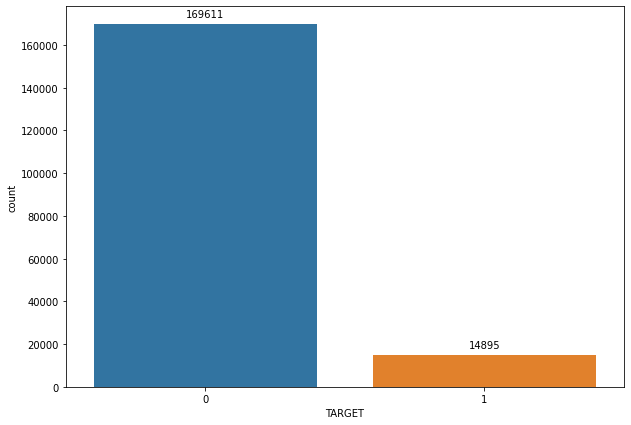

In [21]:
plt.figure(figsize=(10,7))
ax=sns.countplot(x='TARGET',data=train)
for p in ax.patches:
        ax.annotate(p.get_height(), (p.get_x() + p.get_width() / 2., p.get_height()), ha = 'center', va = 'center', xytext = (0, 10), textcoords = 'offset points')
plt.show()

0 indicates people who repayed all the installments on time and 1 indicates people who repayed the installment late at least once

From the above graph, we can infer that a high percentage of people (91.93%) repayed the installments on time, so the target label is highly imbalanced.

PLOTTING COUNTS OF ALL THE COLUMNS

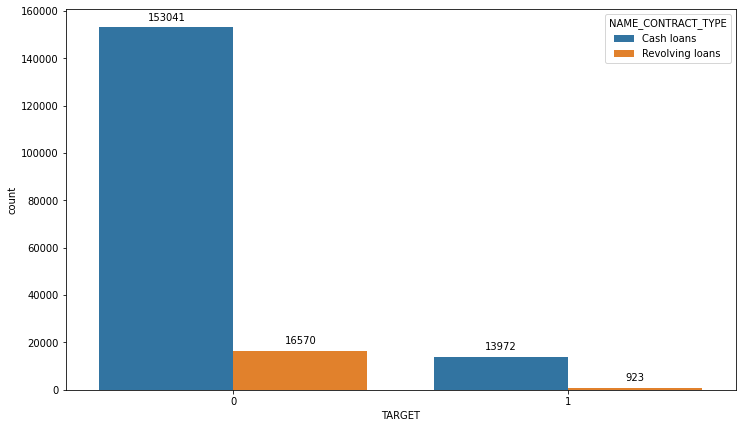

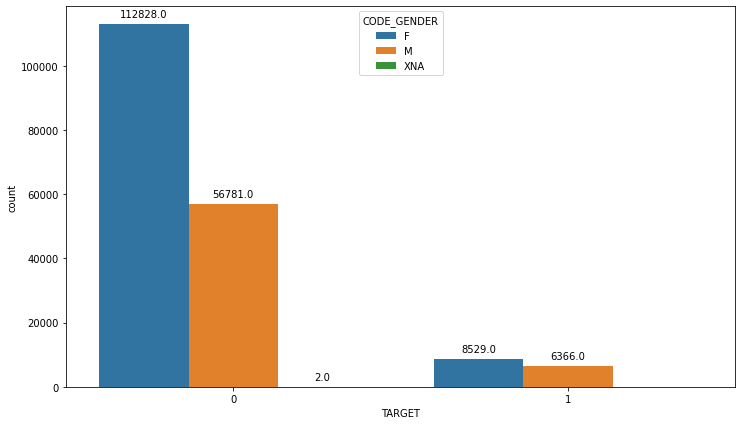

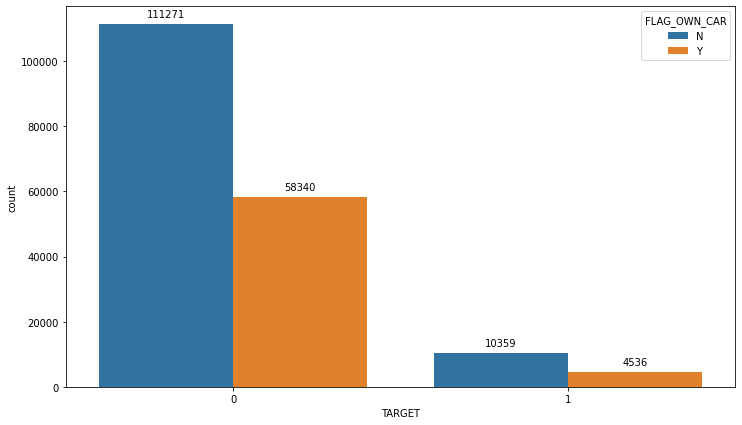

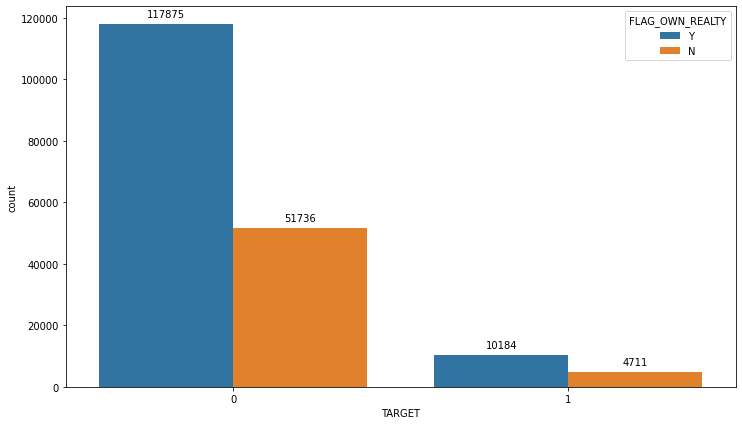

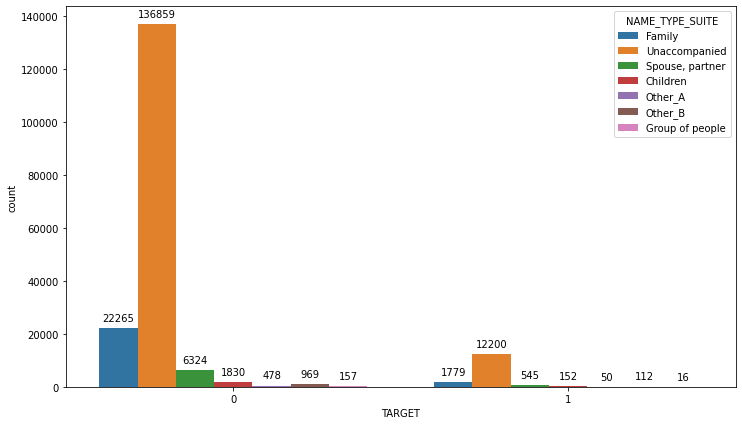

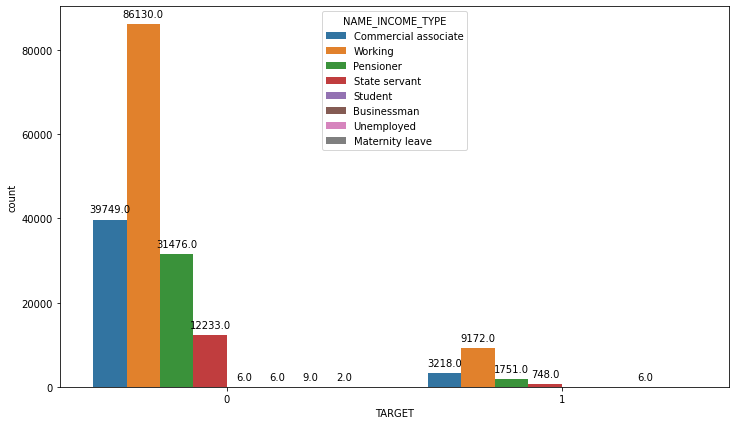

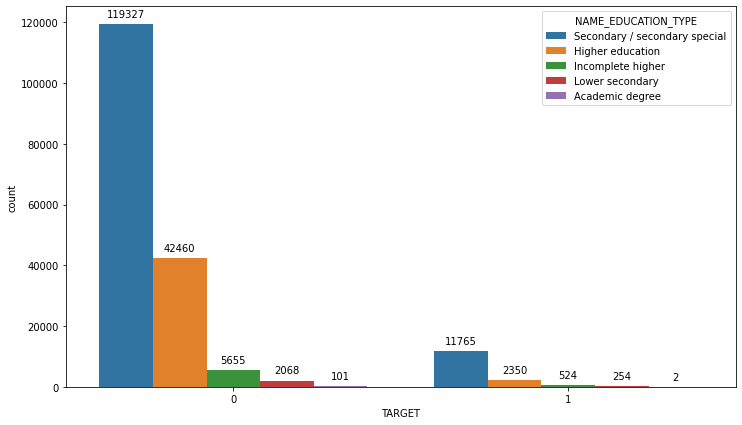

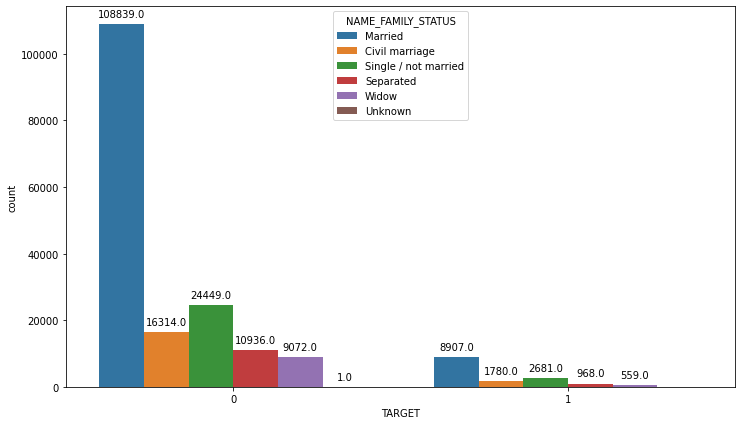

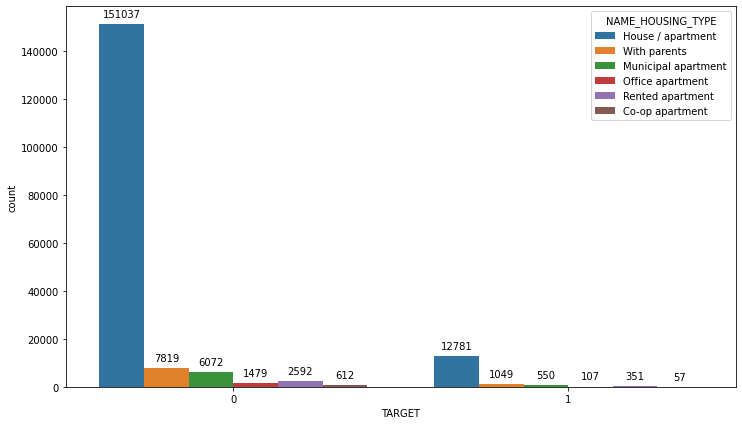

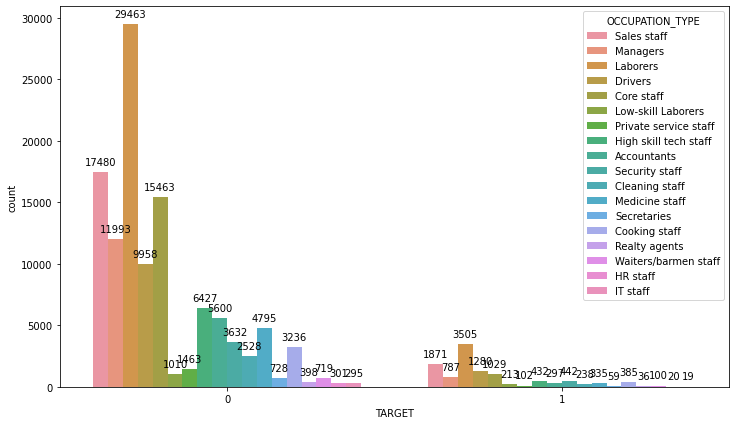

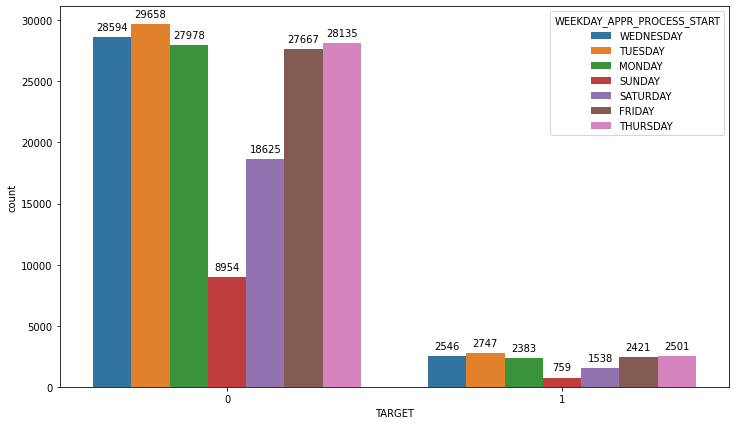

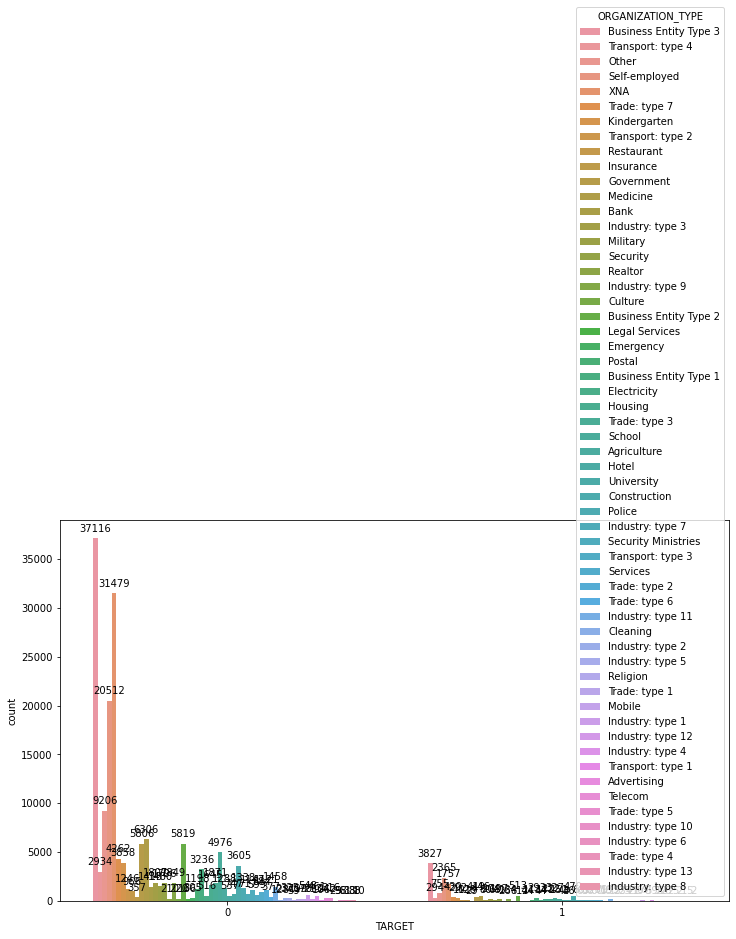

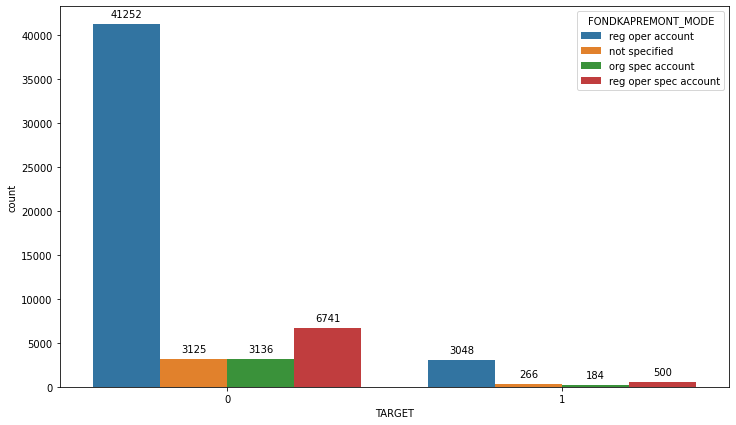

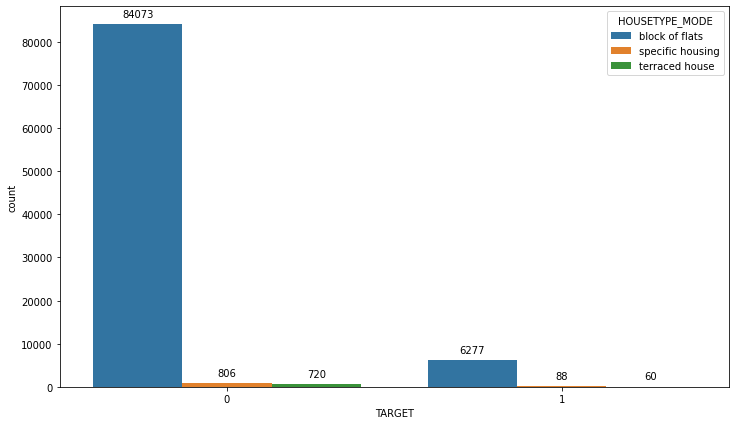

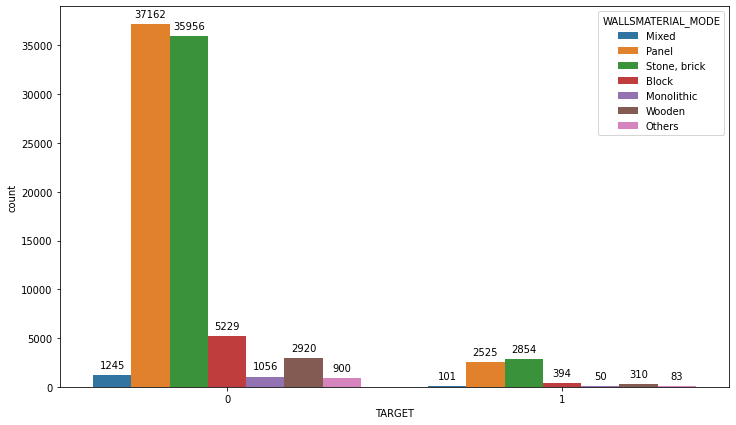

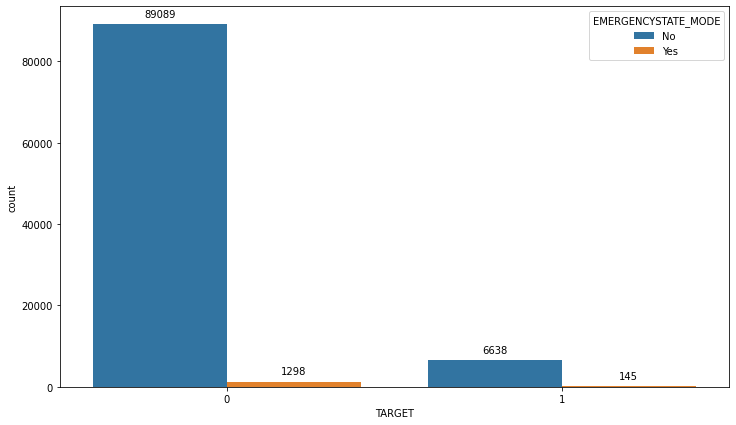

In [22]:
for i in train:
    if (train[i].dtype=='object'):
        plt.figure(figsize=(12,7))
        ax=sns.countplot(data=train,x='TARGET',hue=i)
        for p in ax.patches:
              ax.annotate(p.get_height(), (p.get_x() + p.get_width() / 2., p.get_height()), ha = 'center', va = 'center', xytext = (0, 10), textcoords = 'offset points')
        plt.show()


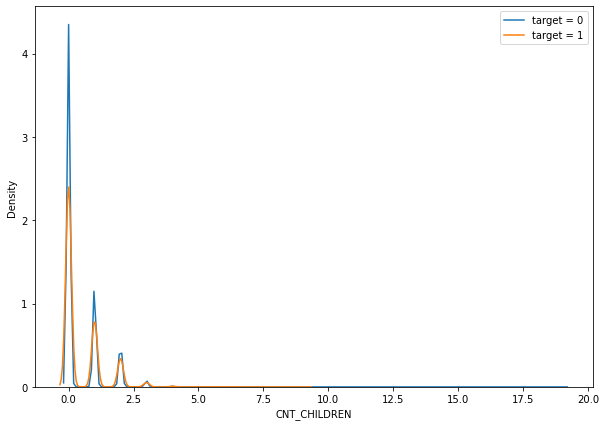

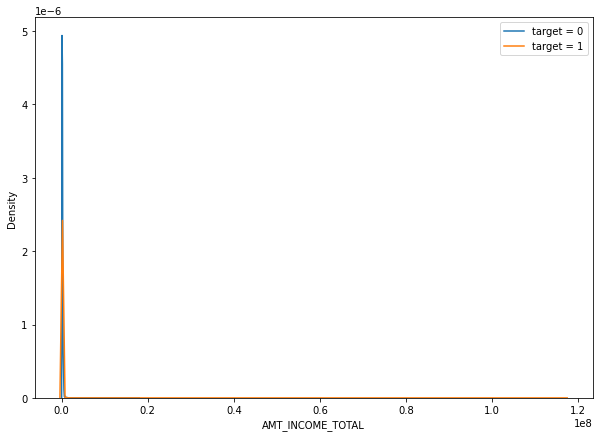

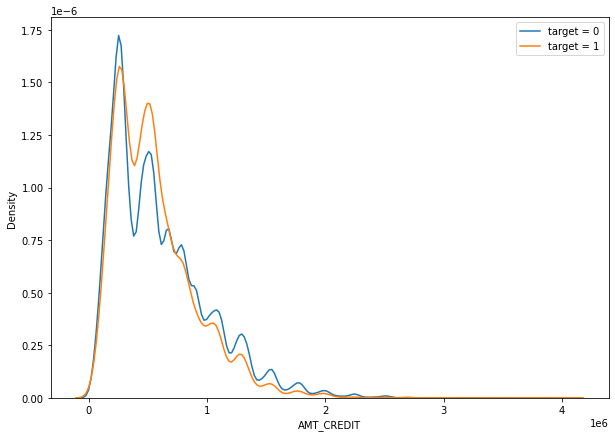

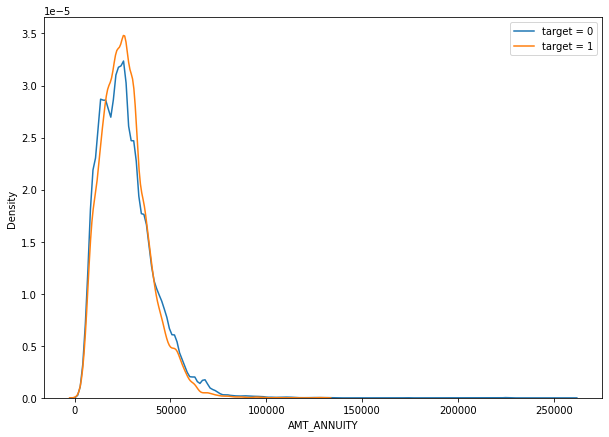

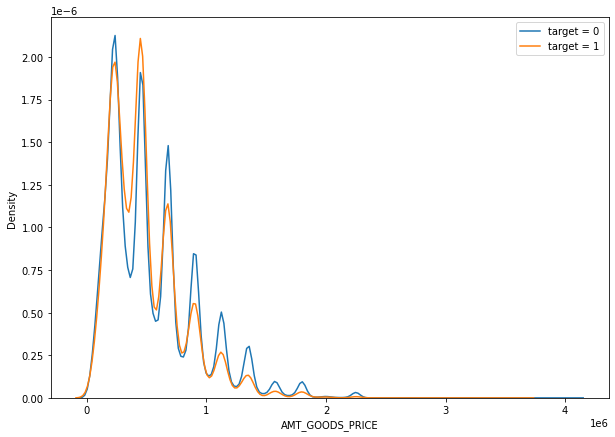

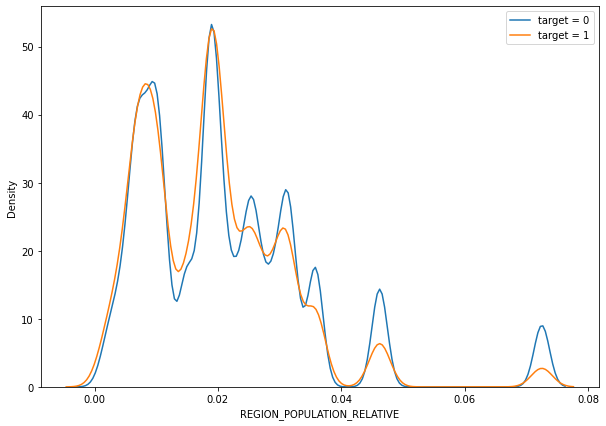

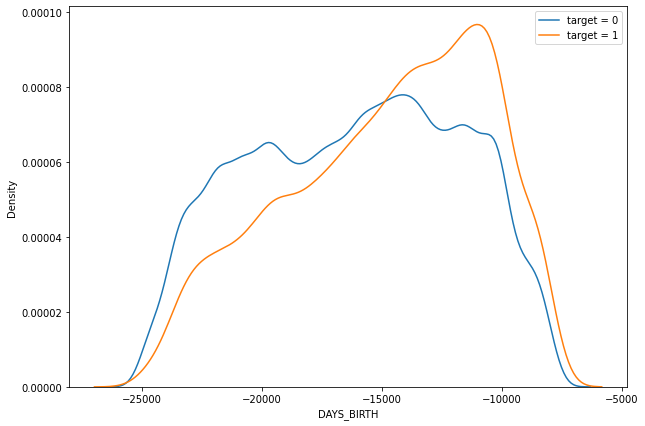

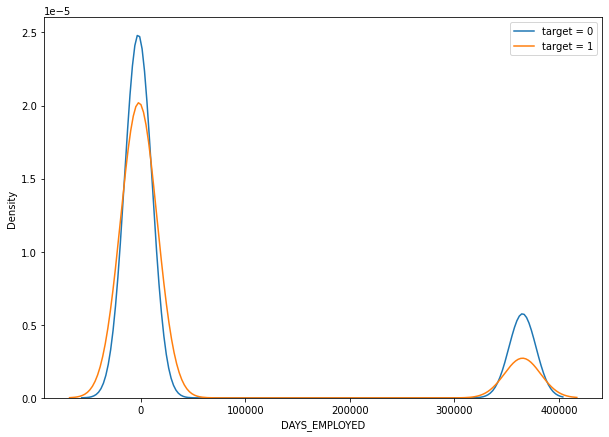

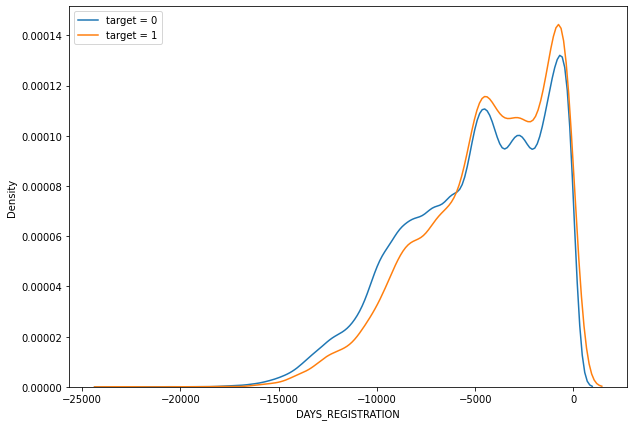

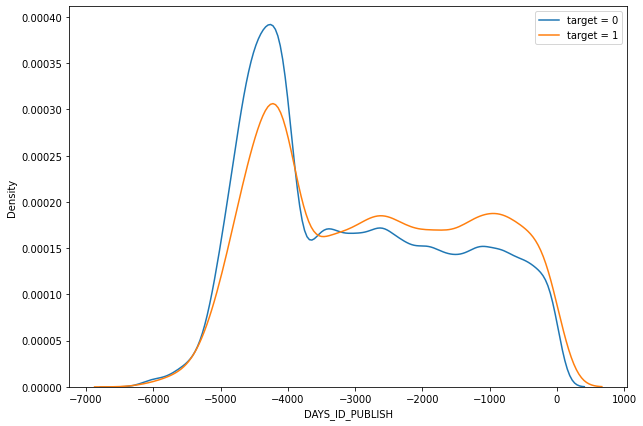

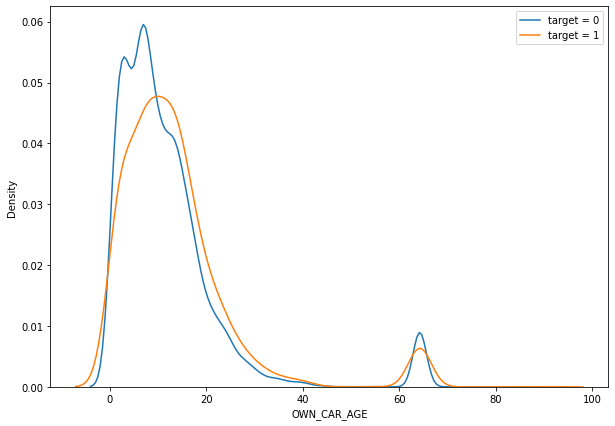

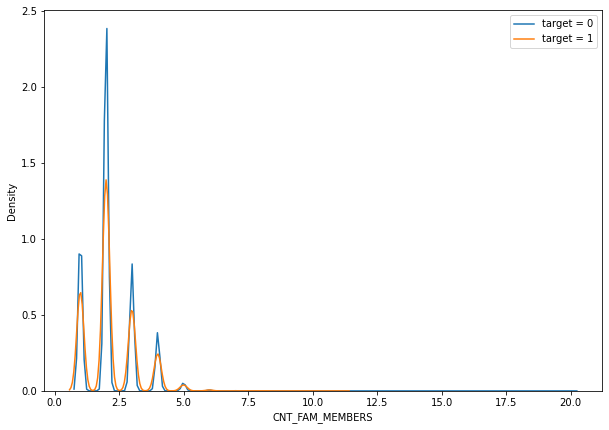

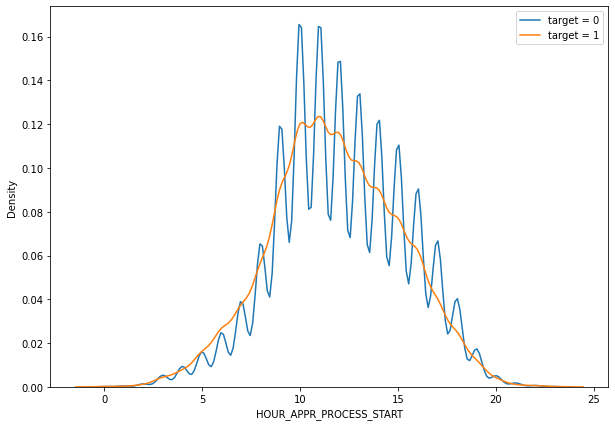

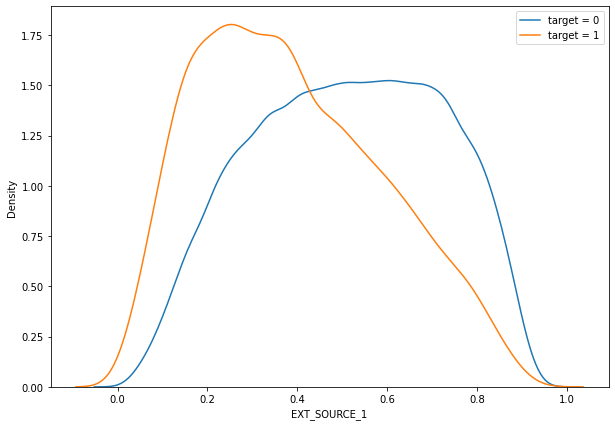

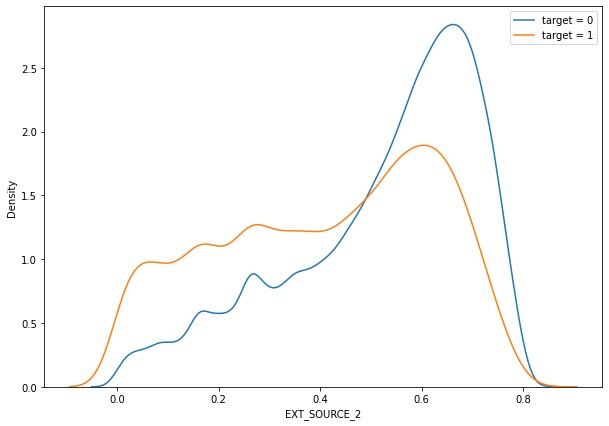

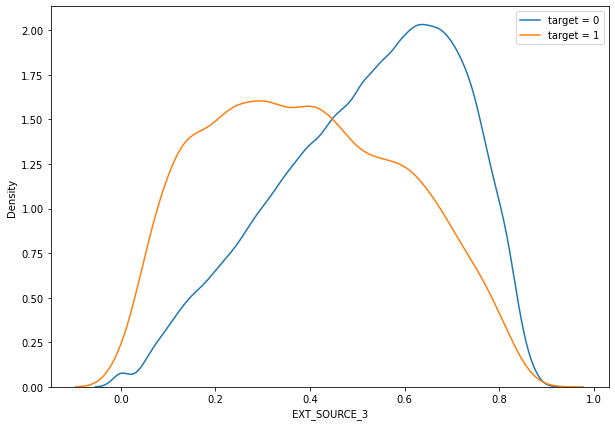

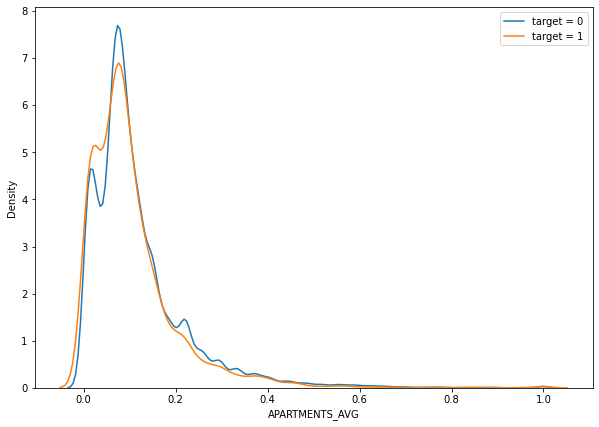

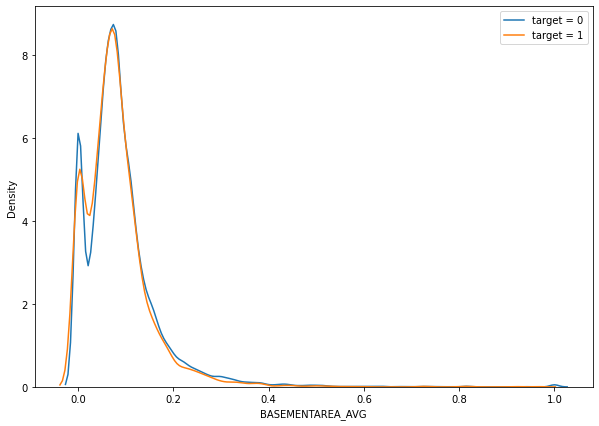

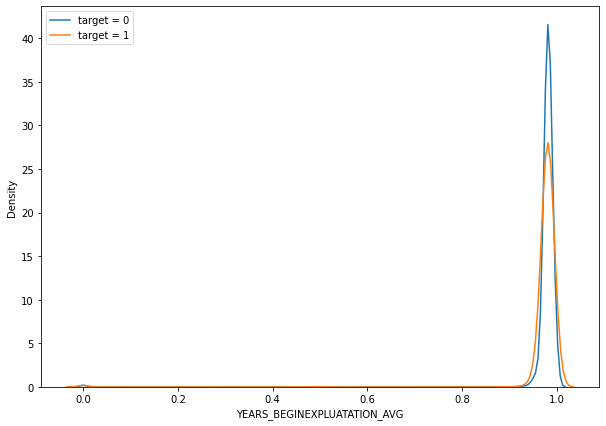

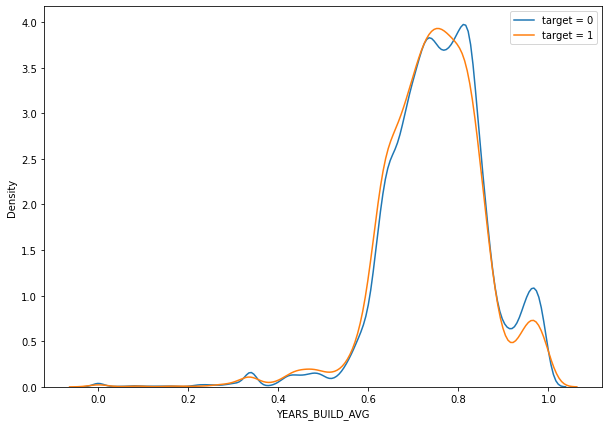

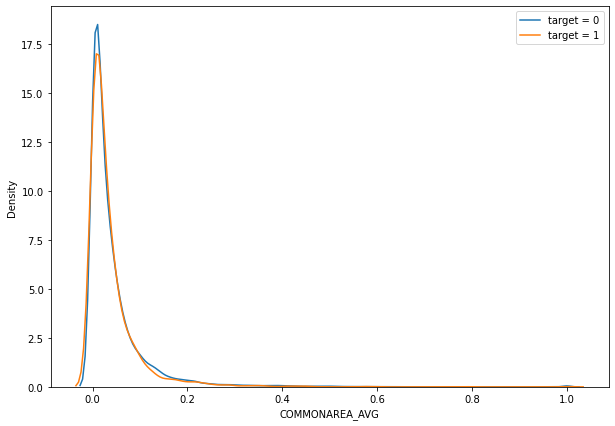

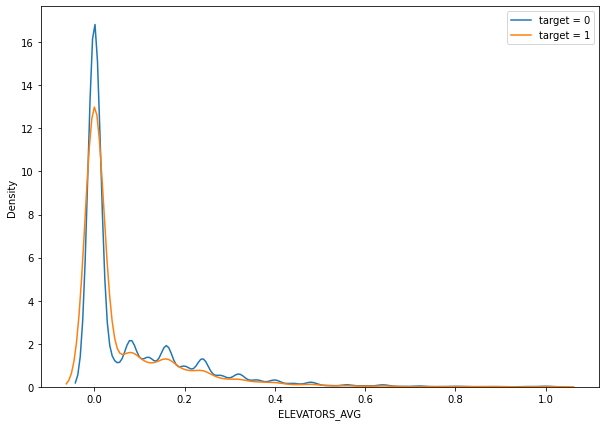

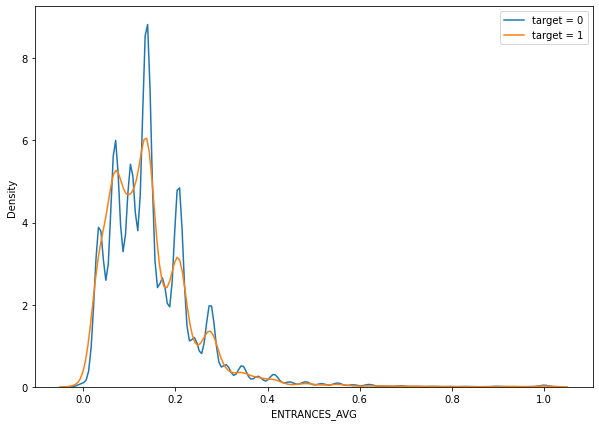

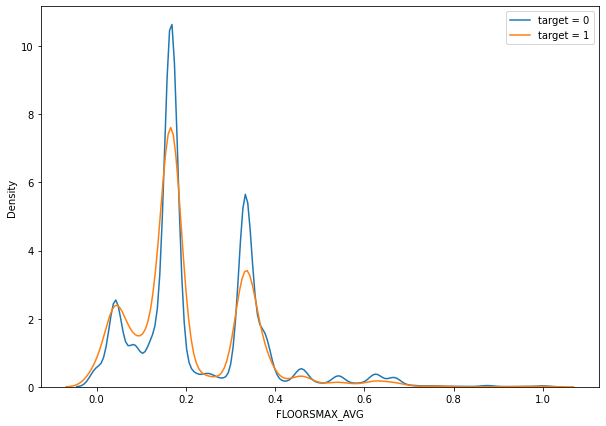

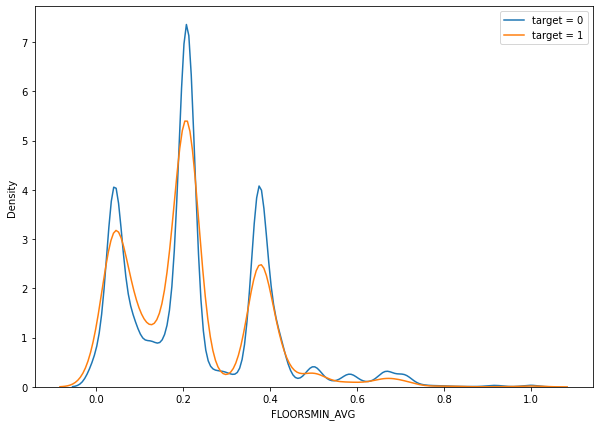

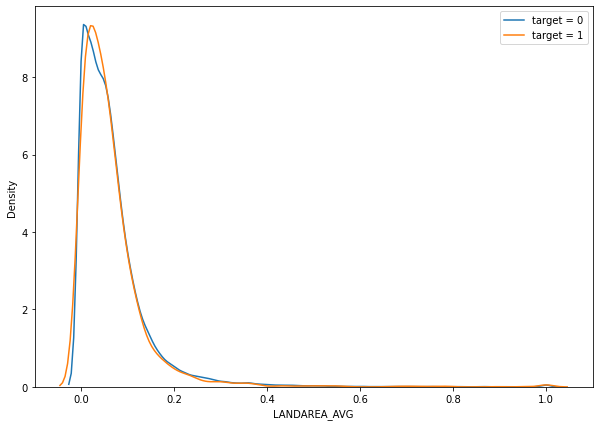

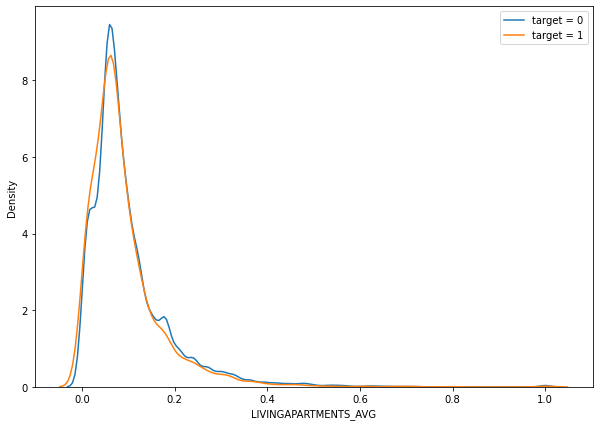

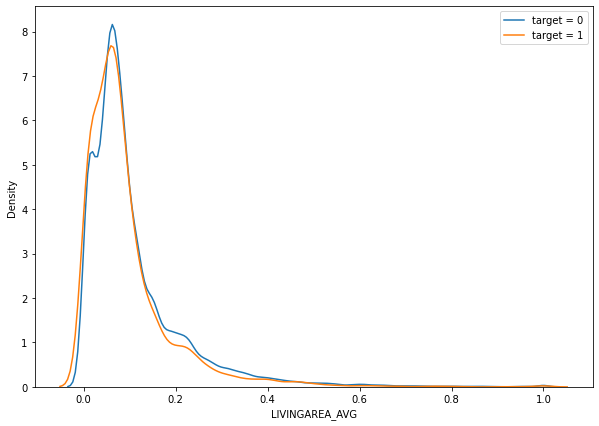

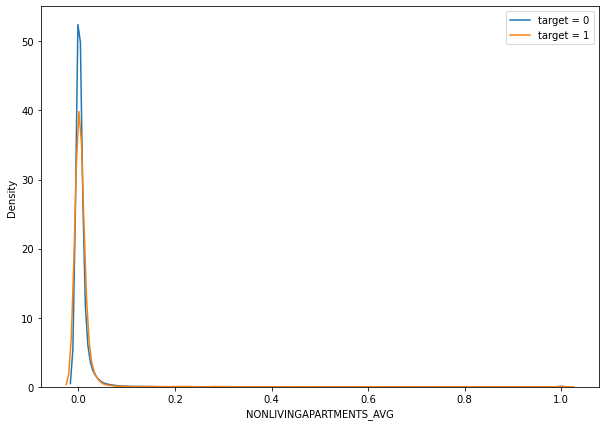

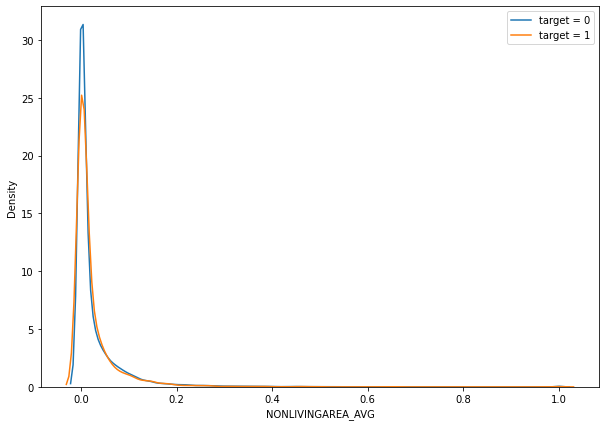

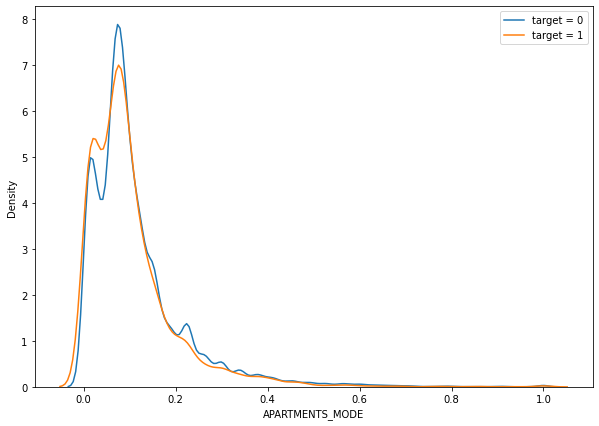

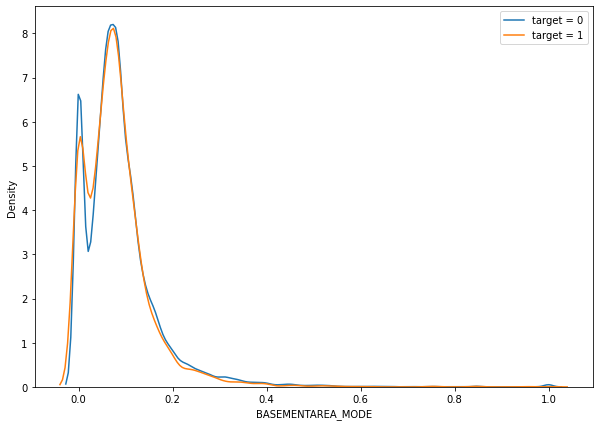

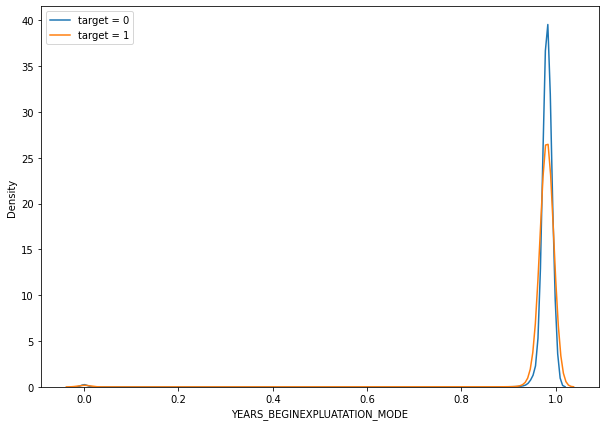

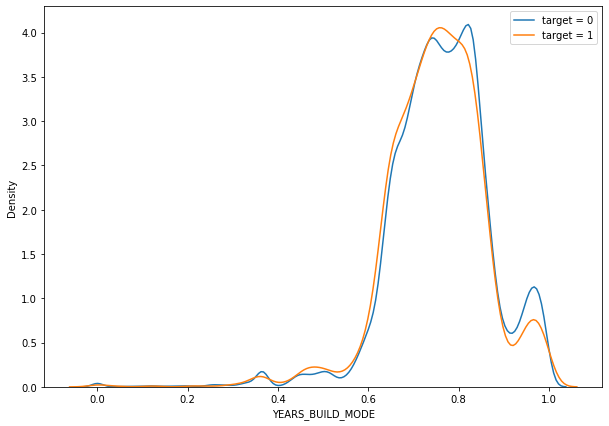

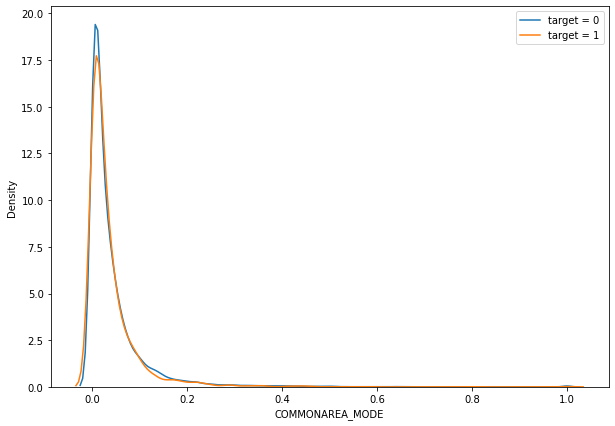

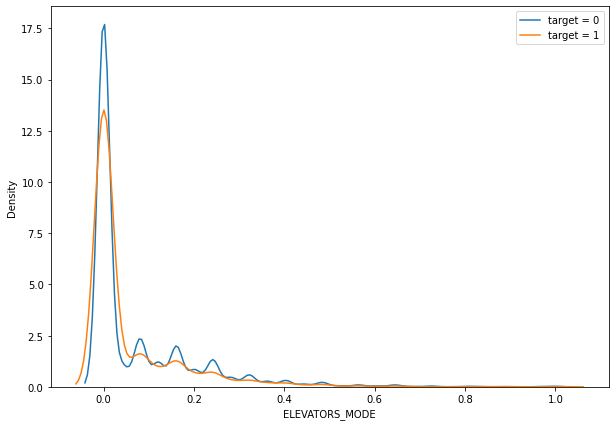

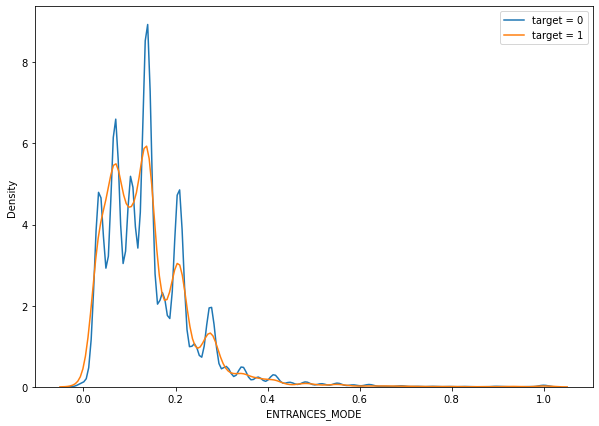

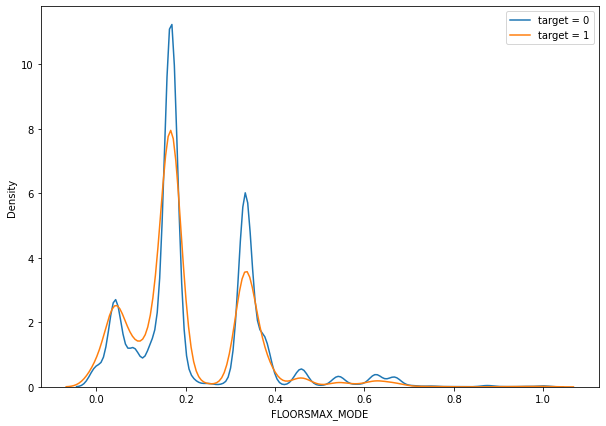

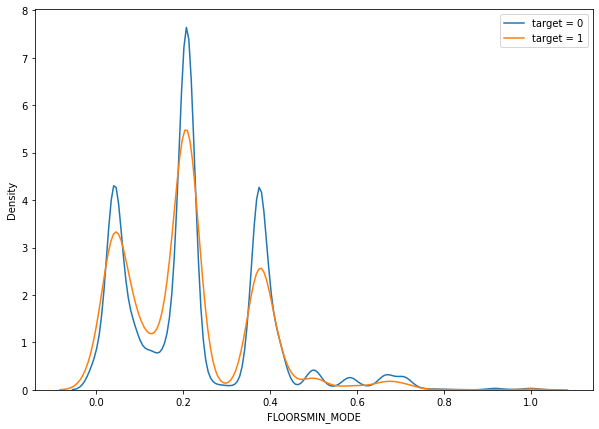

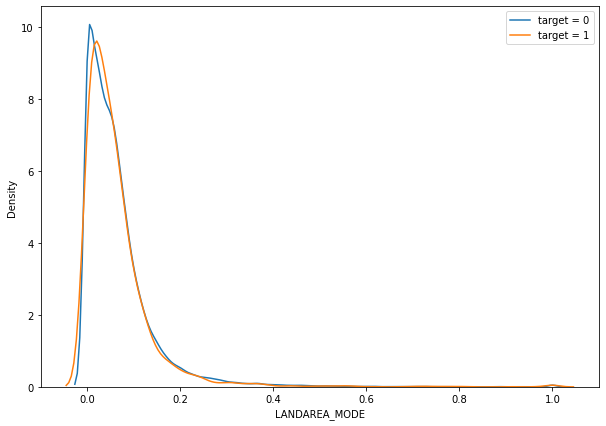

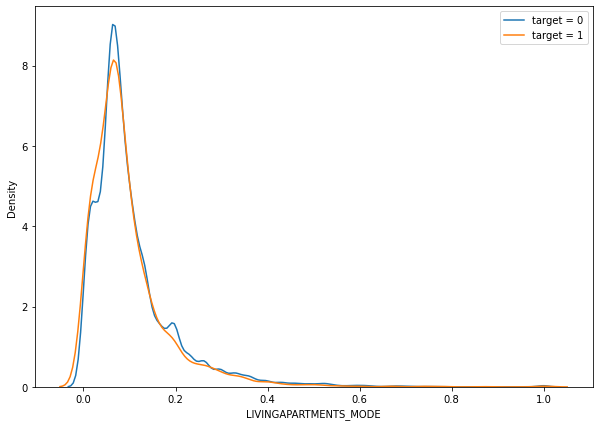

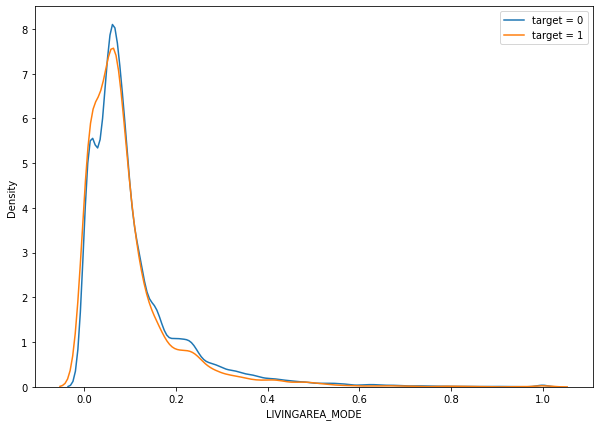

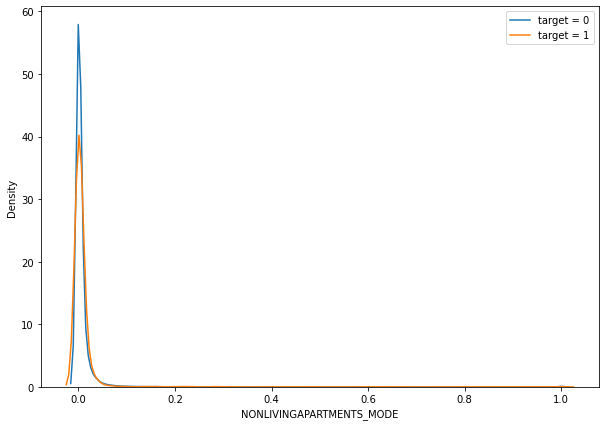

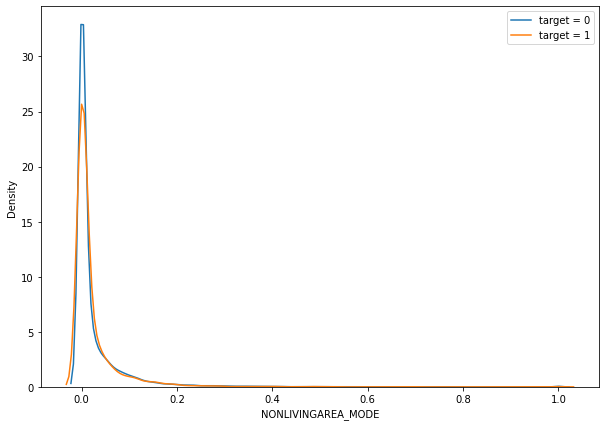

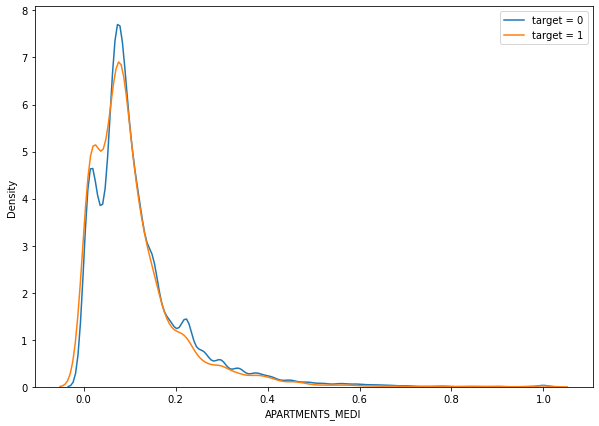

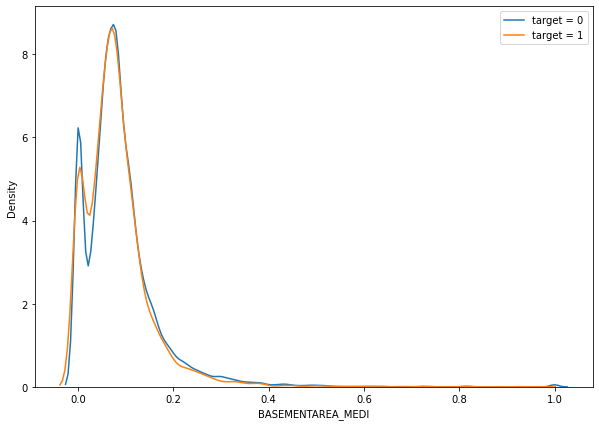

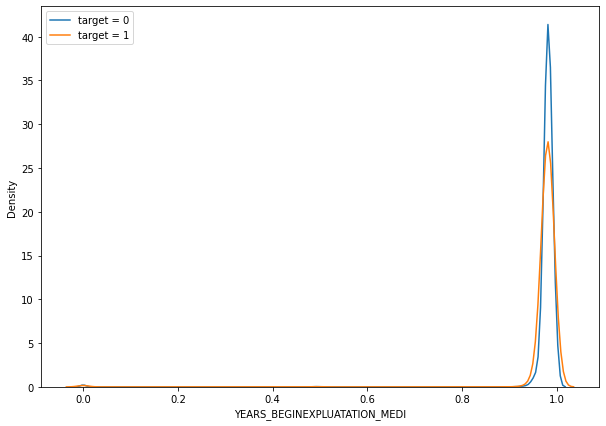

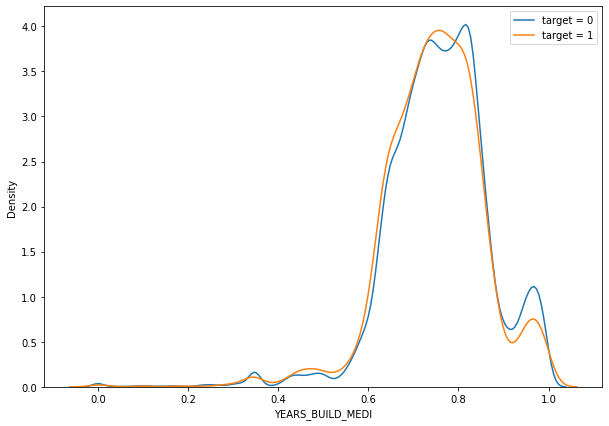

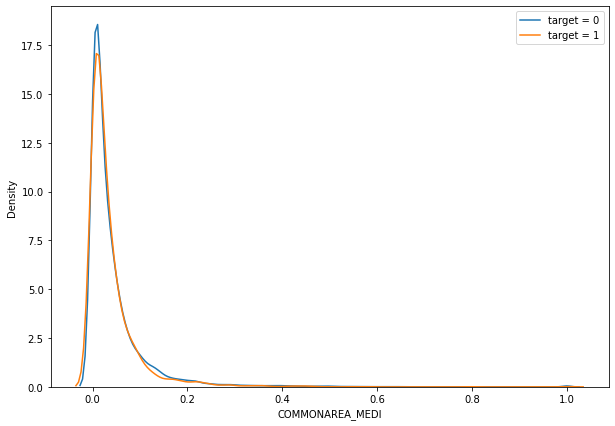

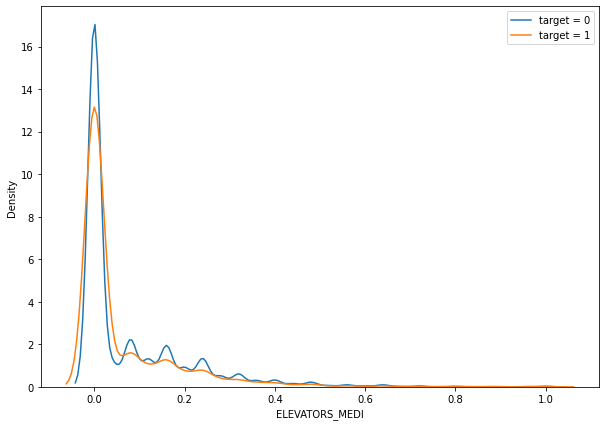

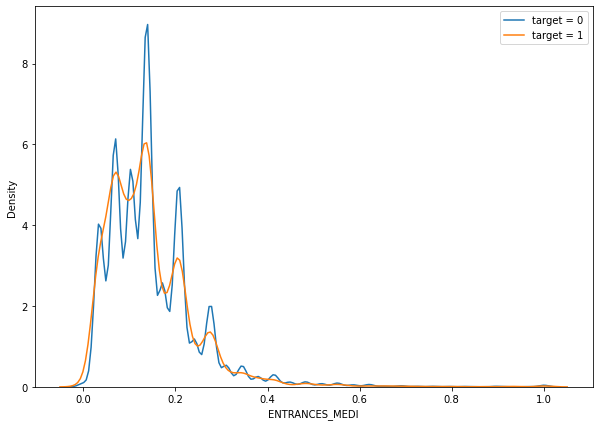

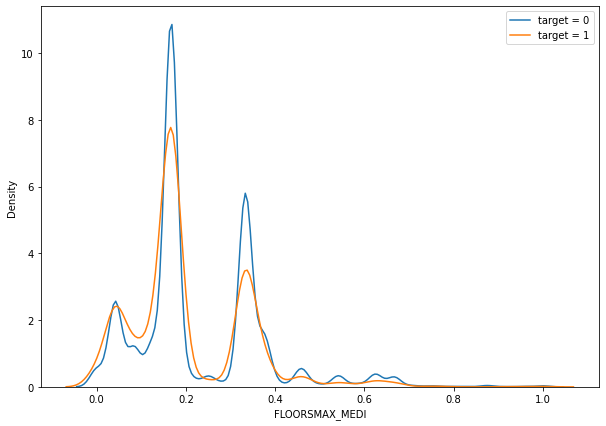

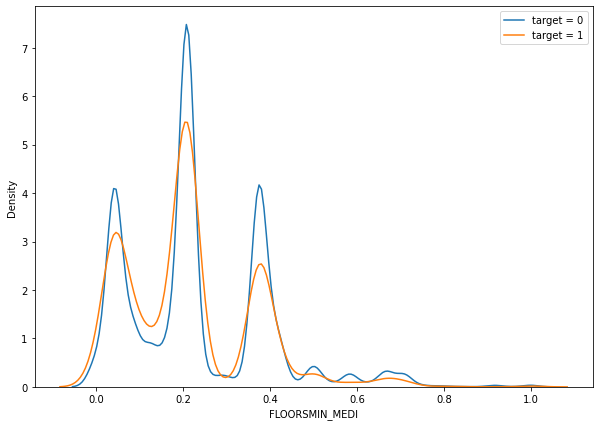

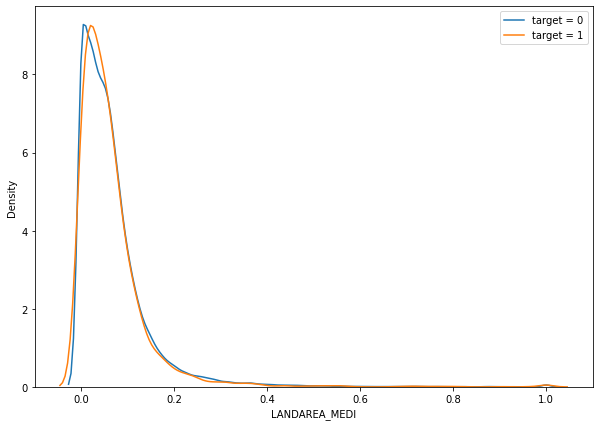

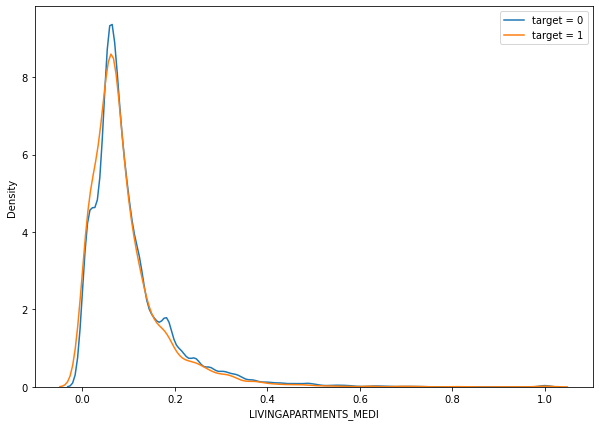

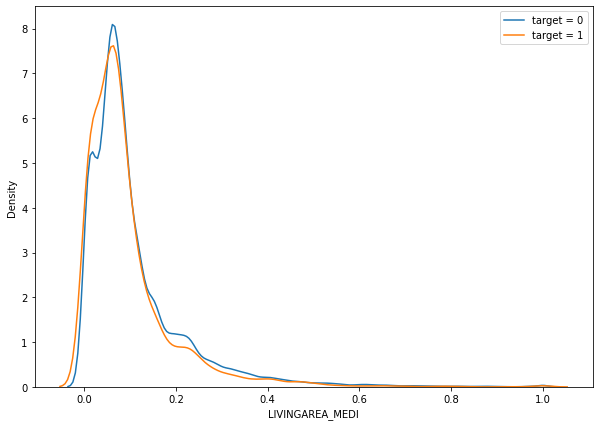

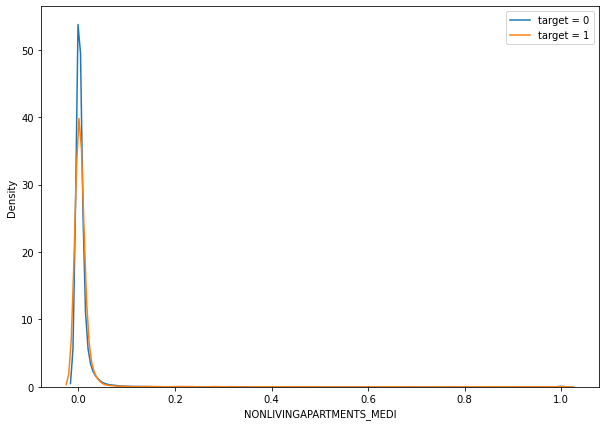

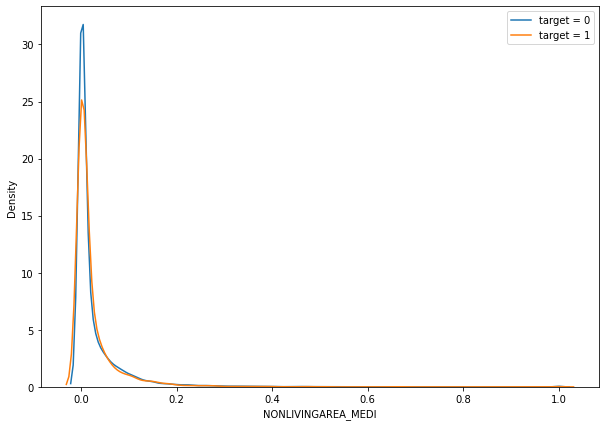

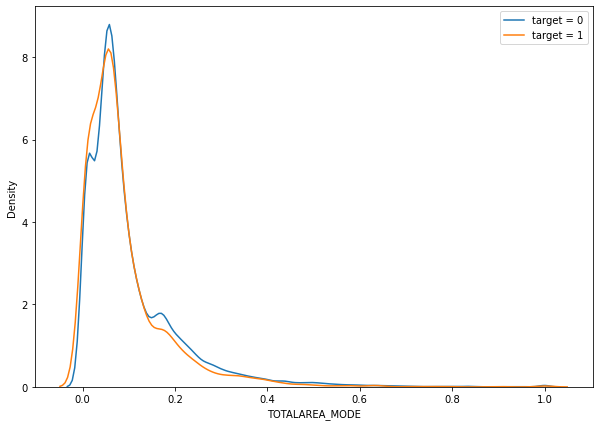

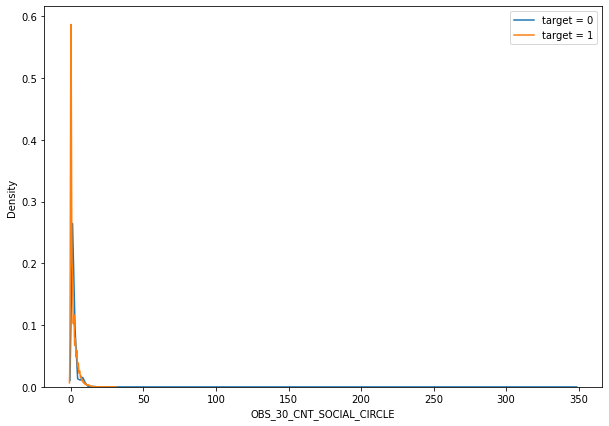

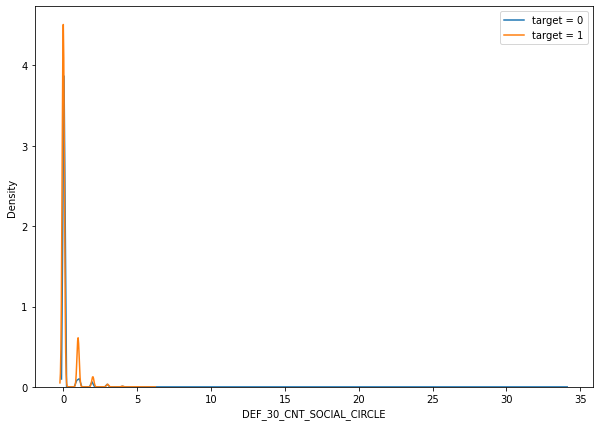

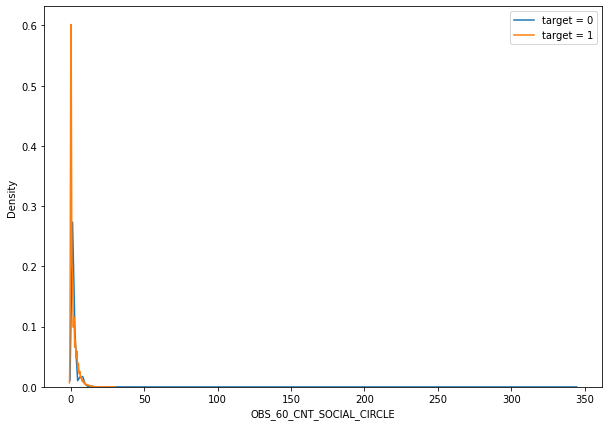

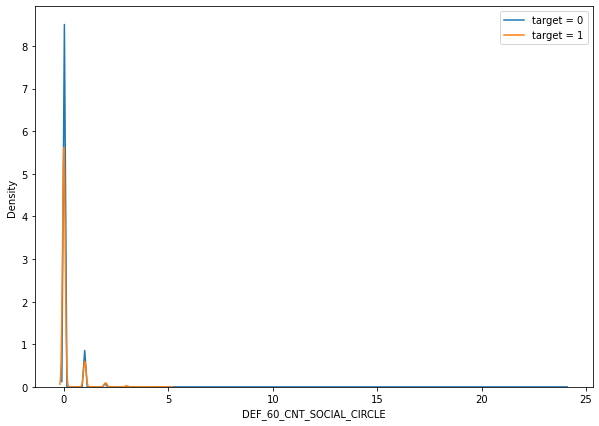

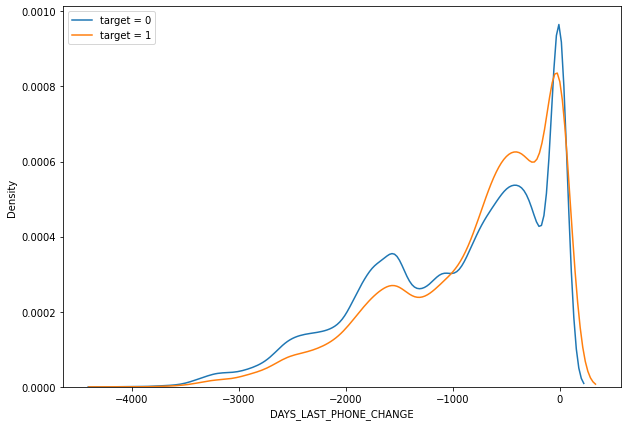

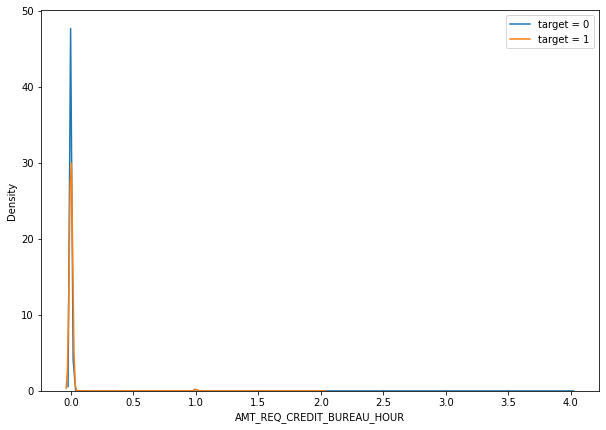

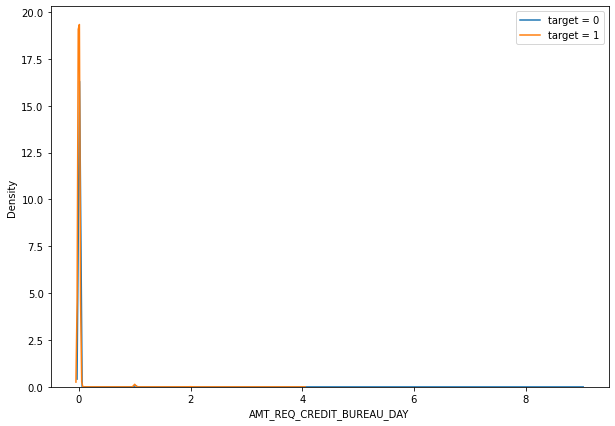

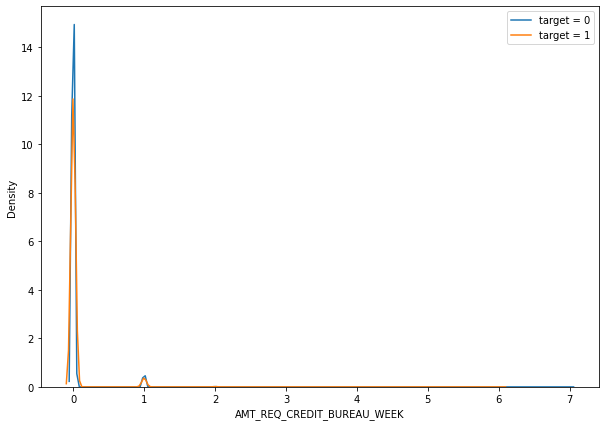

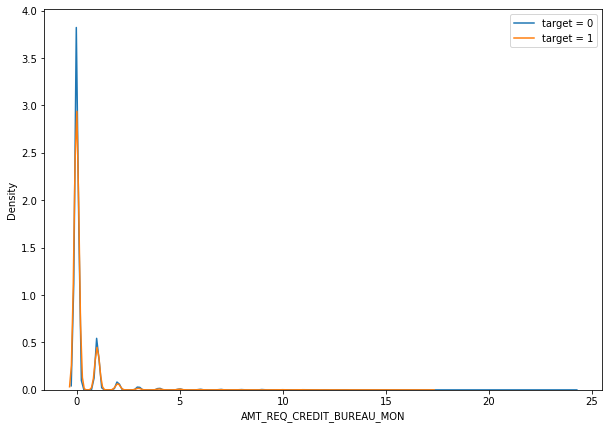

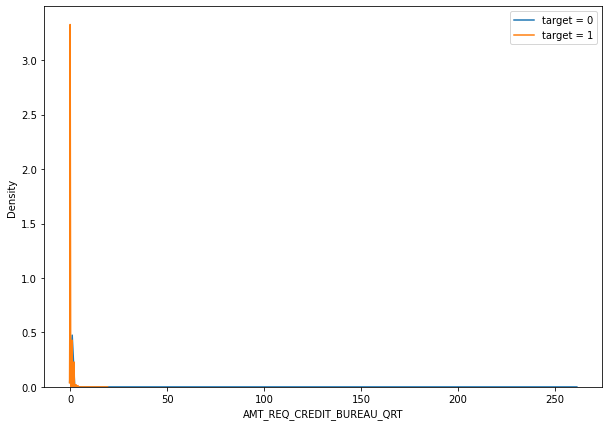

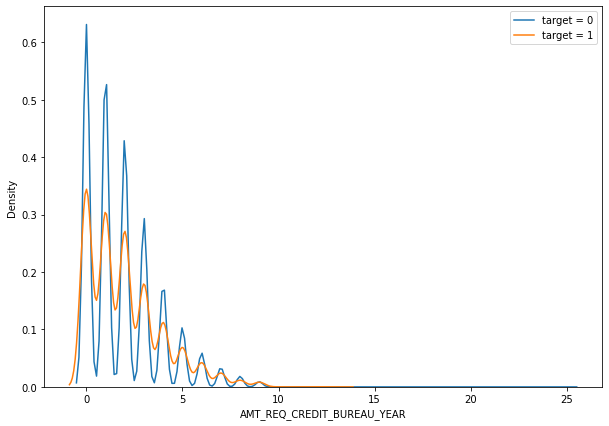

In [23]:
for i in train:
    if (len(train[i].unique())>3 and train[i].dtype != 'object'):
        plt.figure(figsize=(10,7))
        sns.kdeplot(train.loc[train['TARGET'] == 0, i], label = 'target = 0')
        sns.kdeplot(train.loc[train['TARGET'] == 1, i], label = 'target = 1')
        plt.legend()
        plt.show()

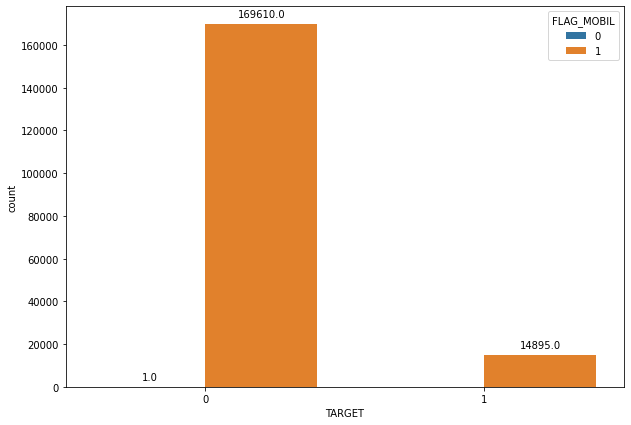

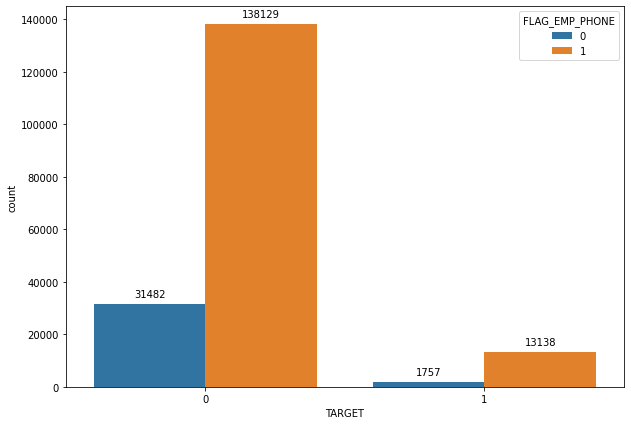

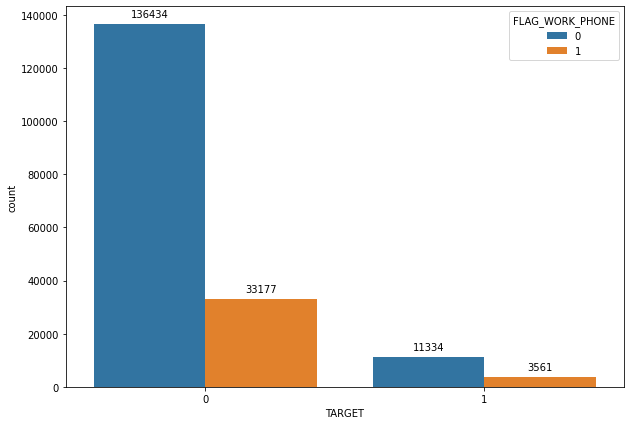

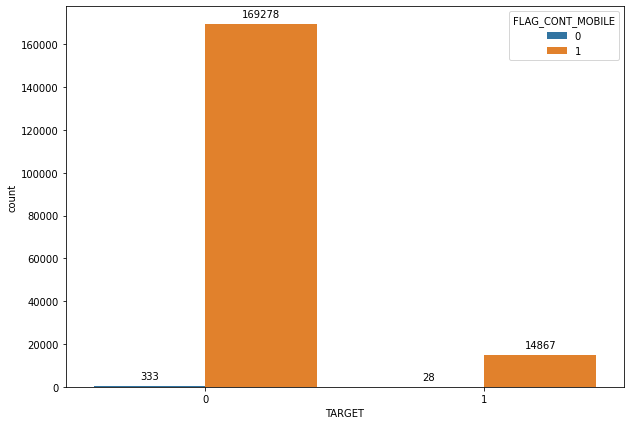

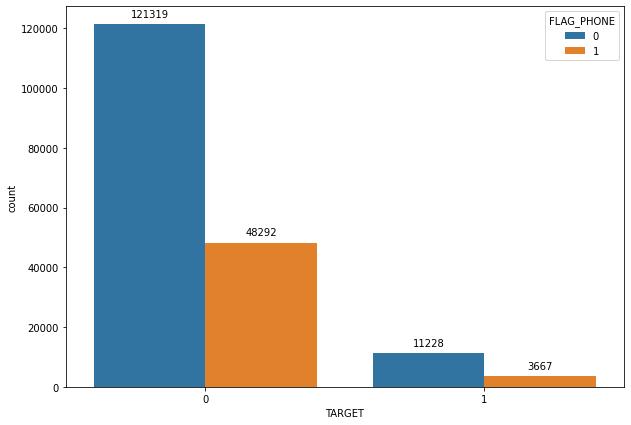

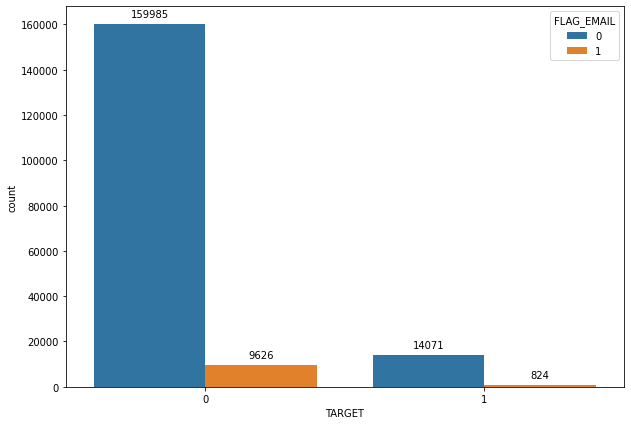

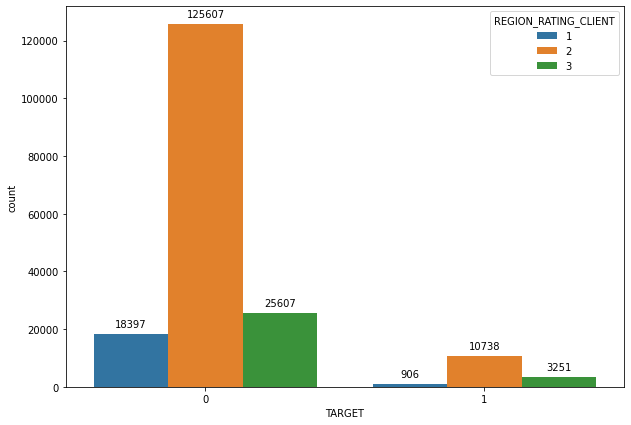

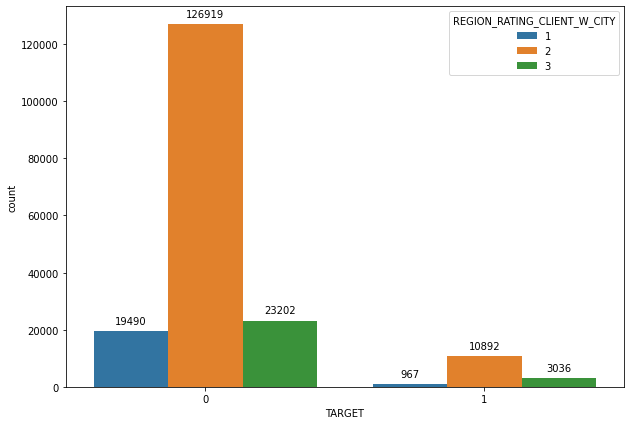

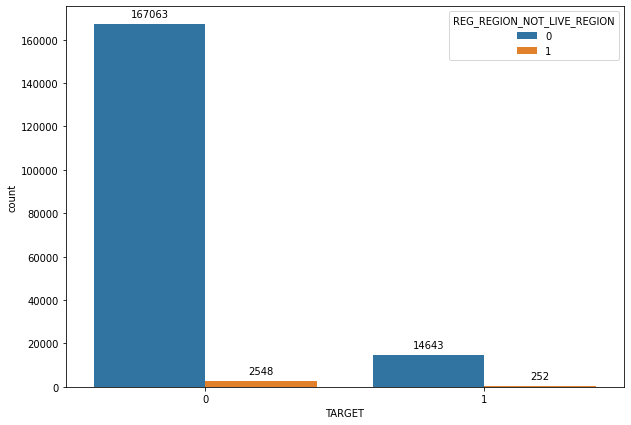

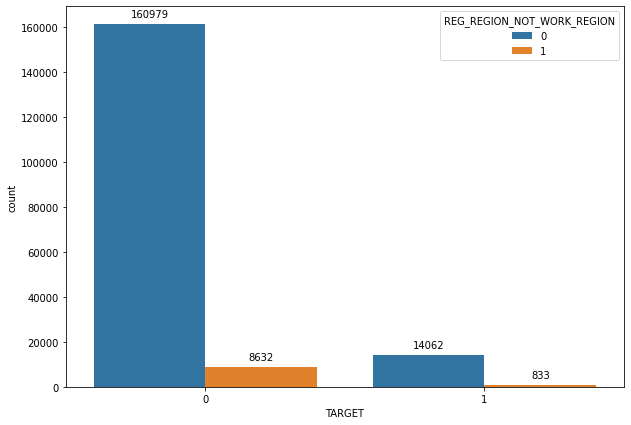

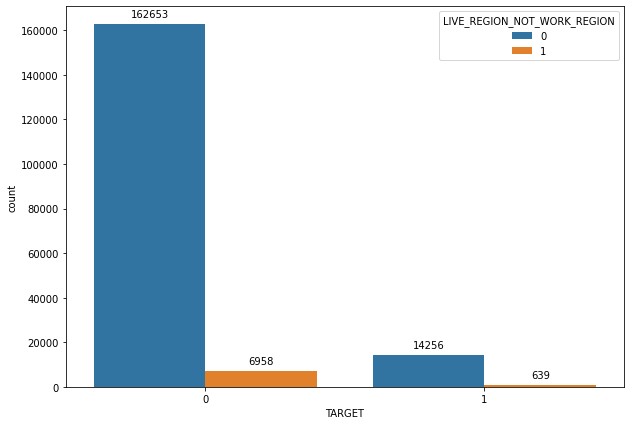

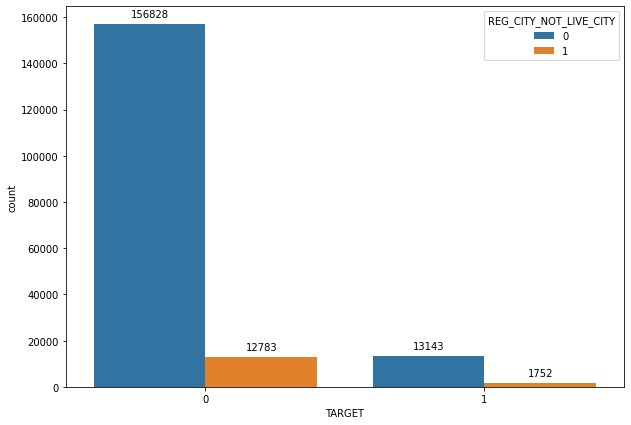

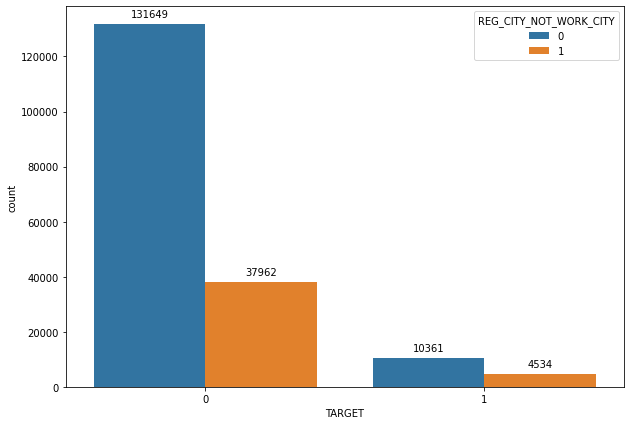

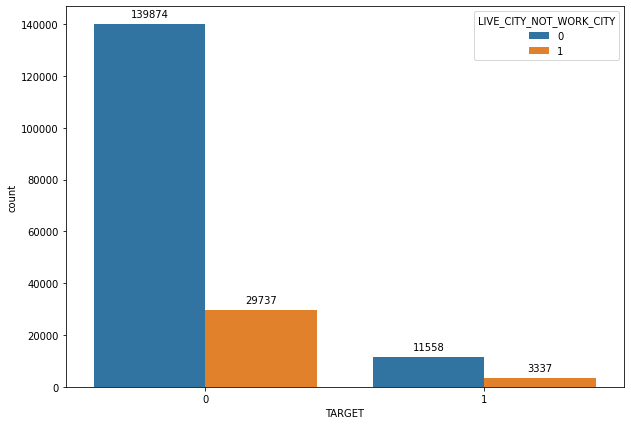

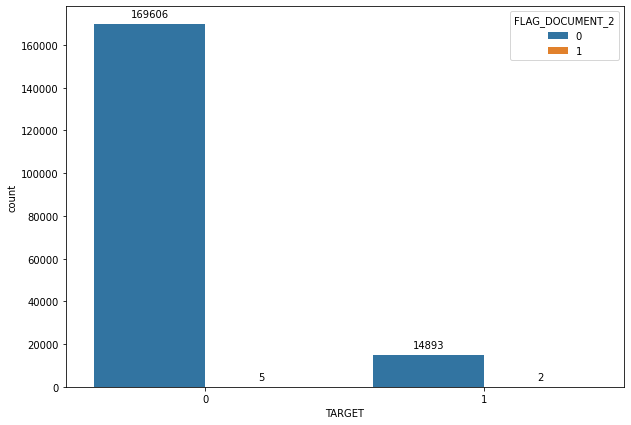

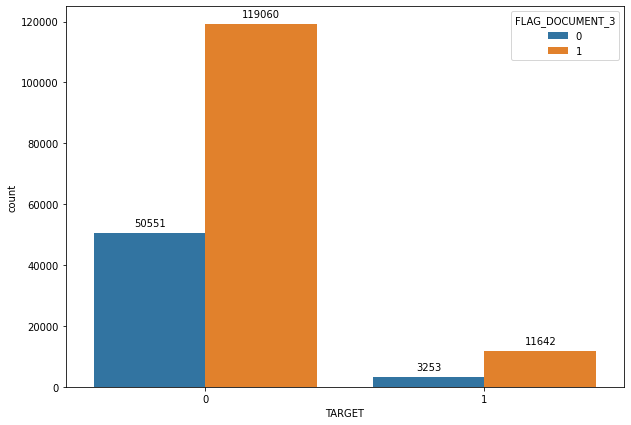

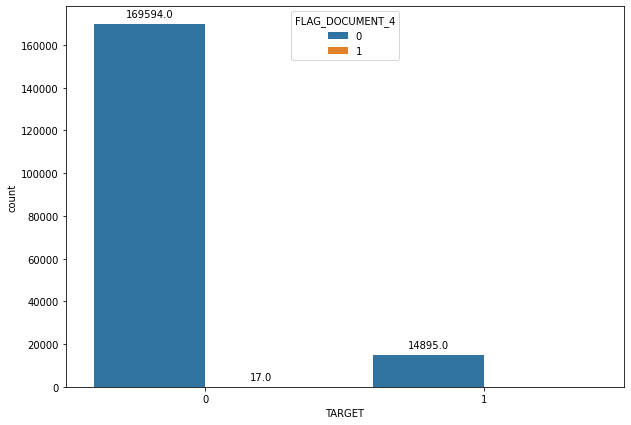

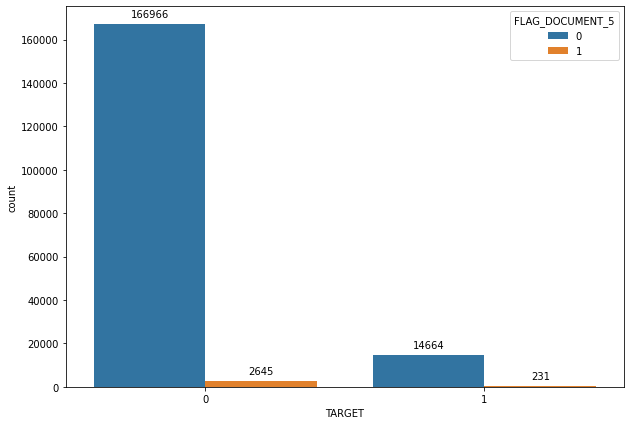

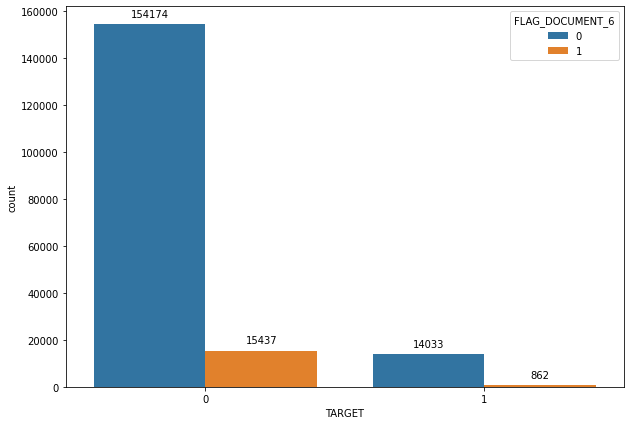

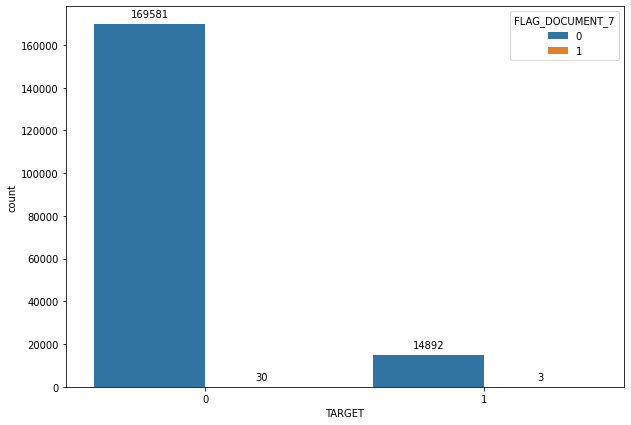

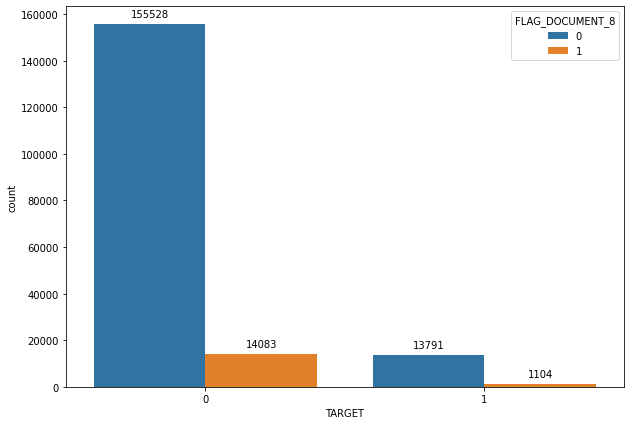

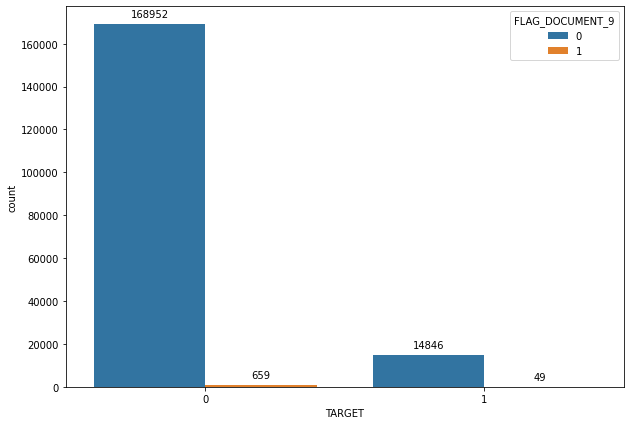

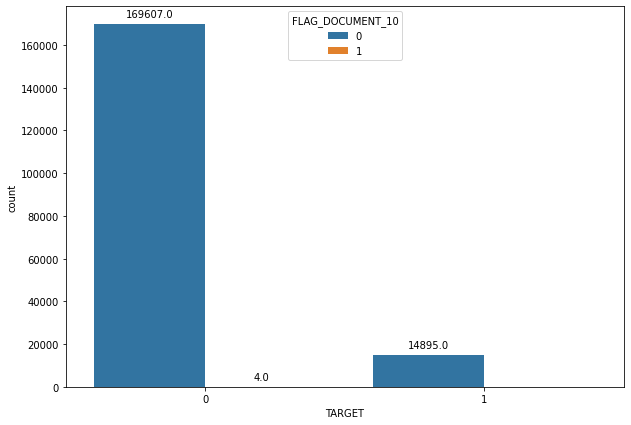

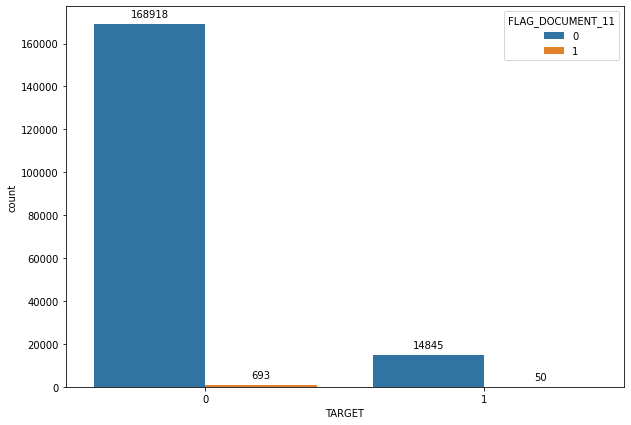

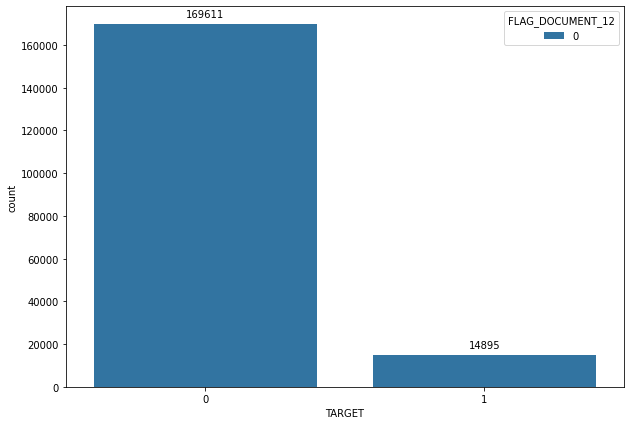

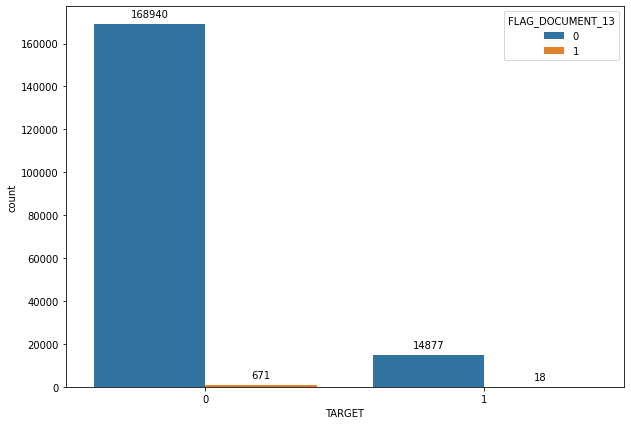

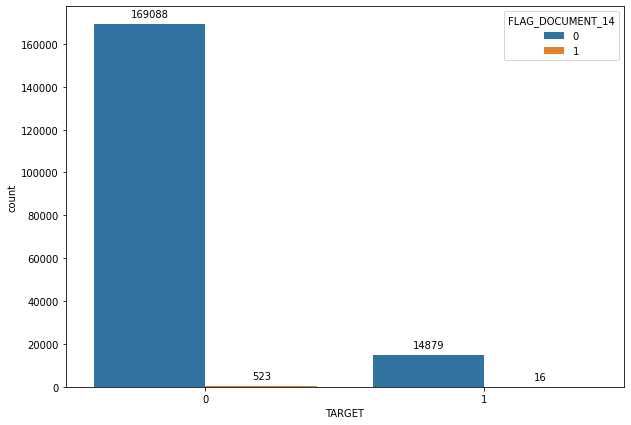

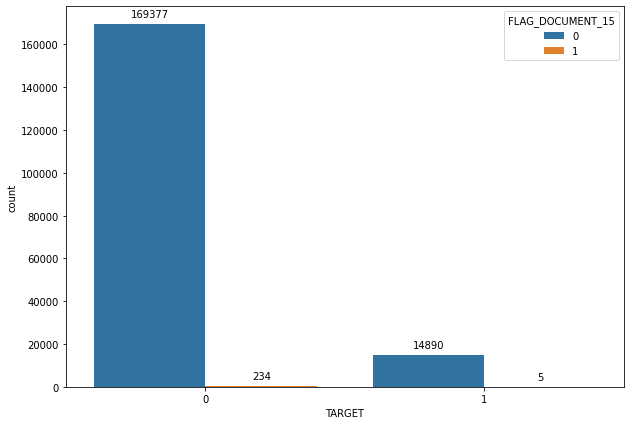

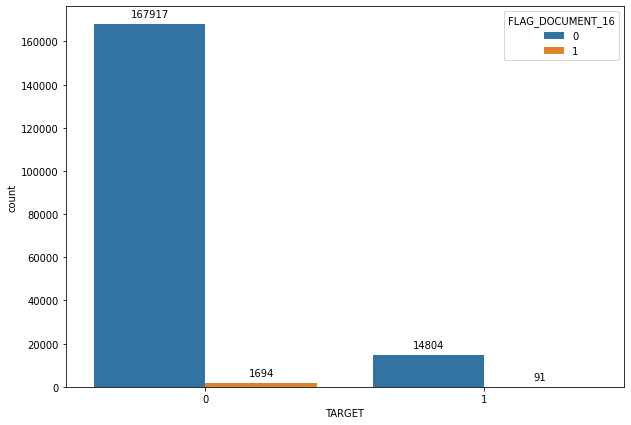

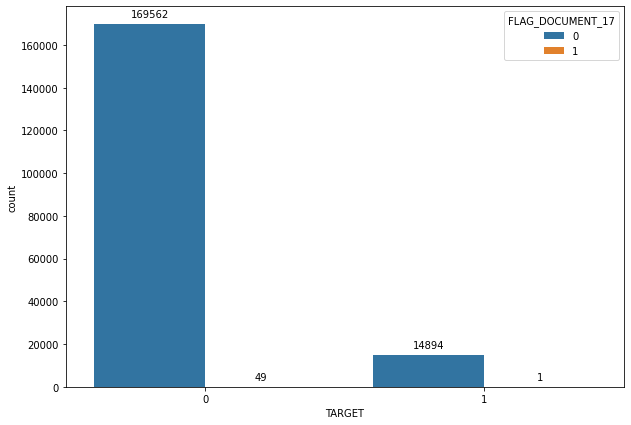

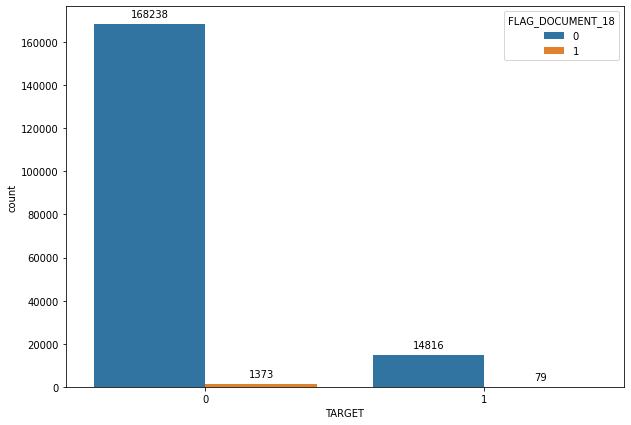

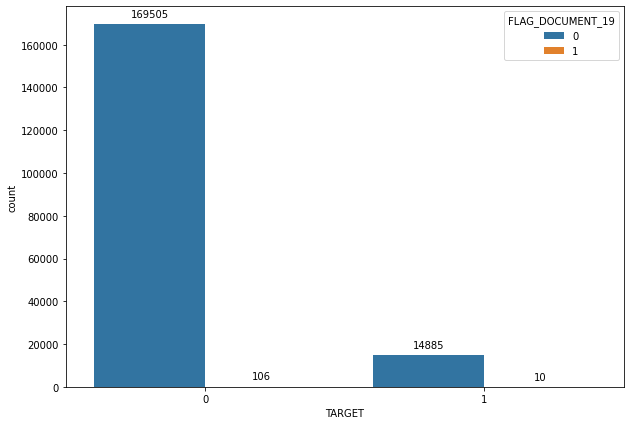

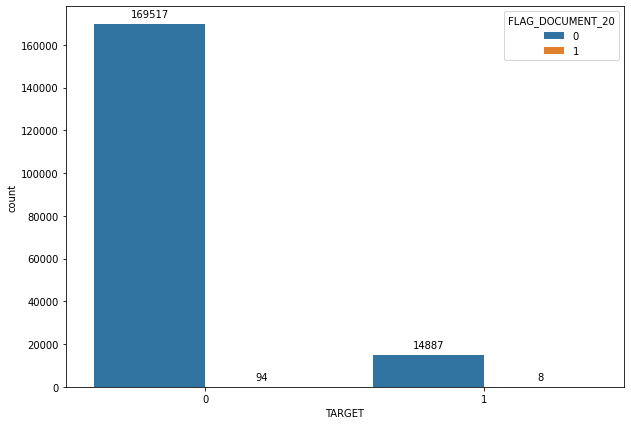

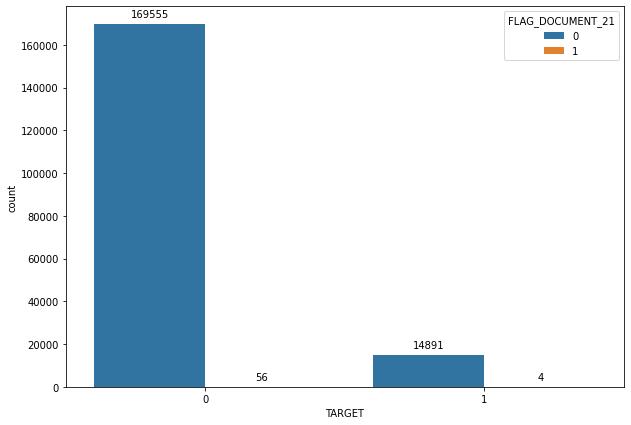

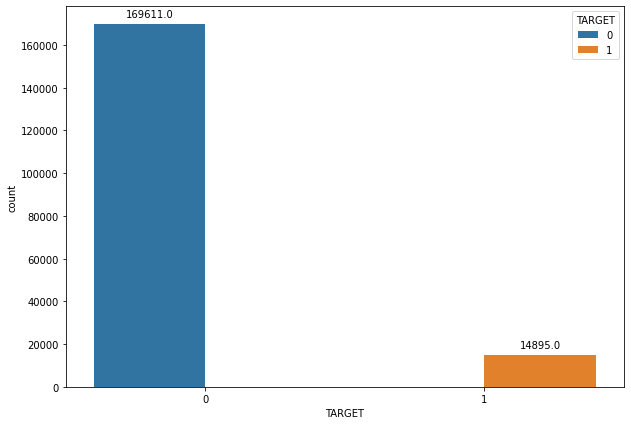

In [24]:
for i in train:
    if (len(train[i].unique())<=3 and not train[i].dtype=='object'):
        plt.figure(figsize=(10,7))
        ax=sns.countplot(data=train,x='TARGET',hue=i)
        for p in ax.patches:
              ax.annotate(p.get_height(), (p.get_x() + p.get_width() / 2., p.get_height()), ha = 'center', va = 'center', xytext = (0, 10), textcoords = 'offset points')
        plt.show()

From the graphs, we observed, Rows with CODE_GENDER = XNA has only 2 Rows, and few XNA in ORGANIZATION_TYPE (This can be treated like an unknown value). So we are manipulating those values to NULL and later dealt, while dealing with null values

In [25]:
train = train.replace('XNA', np.nan)

Also we found that FLAG_MOBIL has just 1 row with a zero, hence its pointless to have that column for training. So removing that column

In [26]:
train = train.drop('FLAG_MOBIL', axis=1)

We do the same with test data

In [27]:
test = test.replace('XNA', np.nan)

In [28]:
test = test.drop('FLAG_MOBIL', axis=1)

#**BASIC PREPROCESSING**

FINDING NULL VALUES (NaN)

In [29]:
train.isna().sum()

NAME_CONTRACT_TYPE                   0
CODE_GENDER                          2
FLAG_OWN_CAR                         0
FLAG_OWN_REALTY                      0
CNT_CHILDREN                         0
AMT_INCOME_TOTAL                     0
AMT_CREDIT                           0
AMT_ANNUITY                          6
AMT_GOODS_PRICE                    167
NAME_TYPE_SUITE                    770
NAME_INCOME_TYPE                     0
NAME_EDUCATION_TYPE                  0
NAME_FAMILY_STATUS                   0
NAME_HOUSING_TYPE                    0
REGION_POPULATION_RELATIVE           0
DAYS_BIRTH                           0
DAYS_EMPLOYED                        0
DAYS_REGISTRATION                    0
DAYS_ID_PUBLISH                      0
OWN_CAR_AGE                     121633
FLAG_EMP_PHONE                       0
FLAG_WORK_PHONE                      0
FLAG_CONT_MOBILE                     0
FLAG_PHONE                           0
FLAG_EMAIL                           0
OCCUPATION_TYPE          

In [30]:
train.isna().sum().sort_values()

NAME_CONTRACT_TYPE                   0
REG_REGION_NOT_LIVE_REGION           0
REG_REGION_NOT_WORK_REGION           0
LIVE_REGION_NOT_WORK_REGION          0
REG_CITY_NOT_LIVE_CITY               0
REG_CITY_NOT_WORK_CITY               0
LIVE_CITY_NOT_WORK_CITY              0
FLAG_DOCUMENT_2                      0
FLAG_DOCUMENT_3                      0
FLAG_DOCUMENT_4                      0
FLAG_DOCUMENT_5                      0
FLAG_DOCUMENT_6                      0
FLAG_DOCUMENT_7                      0
HOUR_APPR_PROCESS_START              0
FLAG_DOCUMENT_8                      0
FLAG_DOCUMENT_10                     0
FLAG_DOCUMENT_11                     0
FLAG_DOCUMENT_12                     0
FLAG_DOCUMENT_13                     0
FLAG_DOCUMENT_14                     0
FLAG_DOCUMENT_15                     0
FLAG_DOCUMENT_16                     0
FLAG_DOCUMENT_17                     0
FLAG_DOCUMENT_18                     0
FLAG_DOCUMENT_19                     0
FLAG_DOCUMENT_20         

In [31]:
null_perc_col=train.isna().sum().sort_values()/len(train)*100
null_perc_col

NAME_CONTRACT_TYPE               0.000000
REG_REGION_NOT_LIVE_REGION       0.000000
REG_REGION_NOT_WORK_REGION       0.000000
LIVE_REGION_NOT_WORK_REGION      0.000000
REG_CITY_NOT_LIVE_CITY           0.000000
REG_CITY_NOT_WORK_CITY           0.000000
LIVE_CITY_NOT_WORK_CITY          0.000000
FLAG_DOCUMENT_2                  0.000000
FLAG_DOCUMENT_3                  0.000000
FLAG_DOCUMENT_4                  0.000000
FLAG_DOCUMENT_5                  0.000000
FLAG_DOCUMENT_6                  0.000000
FLAG_DOCUMENT_7                  0.000000
HOUR_APPR_PROCESS_START          0.000000
FLAG_DOCUMENT_8                  0.000000
FLAG_DOCUMENT_10                 0.000000
FLAG_DOCUMENT_11                 0.000000
FLAG_DOCUMENT_12                 0.000000
FLAG_DOCUMENT_13                 0.000000
FLAG_DOCUMENT_14                 0.000000
FLAG_DOCUMENT_15                 0.000000
FLAG_DOCUMENT_16                 0.000000
FLAG_DOCUMENT_17                 0.000000
FLAG_DOCUMENT_18                 0

**DROPPING COLUMNS WITH HIGH % OF NULL VALUES**

In [32]:
train_drop_null_col=[]
for i in train:
    if(null_perc_col[i]>65):
        train_drop_null_col.append(i)
train_drop_null_col

['OWN_CAR_AGE',
 'YEARS_BUILD_AVG',
 'COMMONAREA_AVG',
 'FLOORSMIN_AVG',
 'LIVINGAPARTMENTS_AVG',
 'NONLIVINGAPARTMENTS_AVG',
 'YEARS_BUILD_MODE',
 'COMMONAREA_MODE',
 'FLOORSMIN_MODE',
 'LIVINGAPARTMENTS_MODE',
 'NONLIVINGAPARTMENTS_MODE',
 'YEARS_BUILD_MEDI',
 'COMMONAREA_MEDI',
 'FLOORSMIN_MEDI',
 'LIVINGAPARTMENTS_MEDI',
 'NONLIVINGAPARTMENTS_MEDI',
 'FONDKAPREMONT_MODE']

In [33]:
train.drop(columns =train_drop_null_col,axis=1,inplace = True)
format(train.shape)

'(184506, 103)'

**DROPPING COLUMNS WITH HIGH NULL VALUE % IN TRAIN**

In [34]:
test.drop(columns =train_drop_null_col,axis=1,inplace = True)
format(test.shape)

'(123005, 102)'

FINDING (?) IN DATASET

In [35]:
(train == "?").sum()

NAME_CONTRACT_TYPE              0
CODE_GENDER                     0
FLAG_OWN_CAR                    0
FLAG_OWN_REALTY                 0
CNT_CHILDREN                    0
AMT_INCOME_TOTAL                0
AMT_CREDIT                      0
AMT_ANNUITY                     0
AMT_GOODS_PRICE                 0
NAME_TYPE_SUITE                 0
NAME_INCOME_TYPE                0
NAME_EDUCATION_TYPE             0
NAME_FAMILY_STATUS              0
NAME_HOUSING_TYPE               0
REGION_POPULATION_RELATIVE      0
DAYS_BIRTH                      0
DAYS_EMPLOYED                   0
DAYS_REGISTRATION               0
DAYS_ID_PUBLISH                 0
FLAG_EMP_PHONE                  0
FLAG_WORK_PHONE                 0
FLAG_CONT_MOBILE                0
FLAG_PHONE                      0
FLAG_EMAIL                      0
OCCUPATION_TYPE                 0
CNT_FAM_MEMBERS                 0
REGION_RATING_CLIENT            0
REGION_RATING_CLIENT_W_CITY     0
WEEKDAY_APPR_PROCESS_START      0
HOUR_APPR_PROC

In [36]:
(test == "?").sum()

NAME_CONTRACT_TYPE              0
CODE_GENDER                     0
FLAG_OWN_CAR                    0
FLAG_OWN_REALTY                 0
CNT_CHILDREN                    0
AMT_INCOME_TOTAL                0
AMT_CREDIT                      0
AMT_ANNUITY                     0
AMT_GOODS_PRICE                 0
NAME_TYPE_SUITE                 0
NAME_INCOME_TYPE                0
NAME_EDUCATION_TYPE             0
NAME_FAMILY_STATUS              0
NAME_HOUSING_TYPE               0
REGION_POPULATION_RELATIVE      0
DAYS_BIRTH                      0
DAYS_EMPLOYED                   0
DAYS_REGISTRATION               0
DAYS_ID_PUBLISH                 0
FLAG_EMP_PHONE                  0
FLAG_WORK_PHONE                 0
FLAG_CONT_MOBILE                0
FLAG_PHONE                      0
FLAG_EMAIL                      0
OCCUPATION_TYPE                 0
CNT_FAM_MEMBERS                 0
REGION_RATING_CLIENT            0
REGION_RATING_CLIENT_W_CITY     0
WEEKDAY_APPR_PROCESS_START      0
HOUR_APPR_PROC

There are no (?) in the given dataset

FINDING DUPLICATE ROWS

In [37]:
train.duplicated().sum()

0

There are no duplicate rows which can be removed

#**CORRELATION**

In [38]:
cor_matrix = train.corr().abs()
#cor_matrix

Correlation matrix will be mirror image about the diagonal and all the diagonal elements will be 1 (So diagonal should not be included in any calculation).

Some of the features which are highly correlated that means which are some what linearly dependent with other features. These features contribute very less in predicting the output but increses the computational cost.

In [39]:
upper_t = cor_matrix.abs().where(np.triu(np.ones(cor_matrix.shape), k=1).astype(np.bool))
#upper_t

<ipython-input-39-8b086ac412eb>:1: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  upper_t = cor_matrix.abs().where(np.triu(np.ones(cor_matrix.shape), k=1).astype(np.bool))


In [40]:
train_drop1 = [column for column in upper_t.columns if any(upper_t[column] >= 0.95)]
train_drop1

['AMT_GOODS_PRICE',
 'FLAG_EMP_PHONE',
 'REGION_RATING_CLIENT_W_CITY',
 'APARTMENTS_MODE',
 'BASEMENTAREA_MODE',
 'YEARS_BEGINEXPLUATATION_MODE',
 'ELEVATORS_MODE',
 'ENTRANCES_MODE',
 'FLOORSMAX_MODE',
 'LANDAREA_MODE',
 'LIVINGAREA_MODE',
 'NONLIVINGAREA_MODE',
 'APARTMENTS_MEDI',
 'BASEMENTAREA_MEDI',
 'YEARS_BEGINEXPLUATATION_MEDI',
 'ELEVATORS_MEDI',
 'ENTRANCES_MEDI',
 'FLOORSMAX_MEDI',
 'LANDAREA_MEDI',
 'LIVINGAREA_MEDI',
 'NONLIVINGAREA_MEDI',
 'OBS_60_CNT_SOCIAL_CIRCLE']

Here, we are selecting upper triangular matrix and removing columns with high correlation.

In [41]:
train.drop(columns =train_drop1,axis=1,inplace = True)

In [42]:
format(train.shape)

'(184506, 81)'

In [43]:
c=train.corr().abs()['TARGET']

Here, we are removing columns which has very less correlation with the TARGET.

In [44]:
train_drop2=[]
for i in train:
    if(train[i].dtype!='object' and c[i]<0.005):
        train_drop2.append(i)
train_drop2

['AMT_INCOME_TOTAL',
 'FLAG_CONT_MOBILE',
 'FLAG_EMAIL',
 'REG_REGION_NOT_LIVE_REGION',
 'LIVE_REGION_NOT_WORK_REGION',
 'FLAG_DOCUMENT_2',
 'FLAG_DOCUMENT_4',
 'FLAG_DOCUMENT_5',
 'FLAG_DOCUMENT_7',
 'FLAG_DOCUMENT_9',
 'FLAG_DOCUMENT_10',
 'FLAG_DOCUMENT_11',
 'FLAG_DOCUMENT_17',
 'FLAG_DOCUMENT_19',
 'FLAG_DOCUMENT_20',
 'FLAG_DOCUMENT_21',
 'AMT_REQ_CREDIT_BUREAU_HOUR',
 'AMT_REQ_CREDIT_BUREAU_DAY',
 'AMT_REQ_CREDIT_BUREAU_WEEK',
 'AMT_REQ_CREDIT_BUREAU_QRT']

In [45]:
train.drop(columns =train_drop2,axis=1,inplace = True)

In [46]:
format(train.shape)

'(184506, 61)'

**REMOVING COLUMNS IN TEST WHICH WE REMOVED FROM TRAIN BASED ON CORRELATION**

In [47]:
test.drop(columns =train_drop1,axis=1,inplace = True)

In [48]:
format(test.shape)

'(123005, 80)'

In [49]:
test.drop(columns =train_drop2,axis=1,inplace = True)

In [50]:
format(test.shape)

'(123005, 60)'

#**FILLING IN MISSING/NULL VALUES**

In [51]:
nan_data = {
 'CODE_GENDER':'mode',
 'ORGANIZATION_TYPE':'Not Specified', 
 'AMT_ANNUITY': 0,
 'AMT_GOODS_PRICE': 0,
 'NAME_TYPE_SUITE': 'Not Specified',
 'OWN_CAR_AGE': -1,
 'OCCUPATION_TYPE': 'Not Specified',
 'CNT_FAM_MEMBERS': 'median',
 'EXT_SOURCE_1': 'median',
 'EXT_SOURCE_2': 'median',
 'EXT_SOURCE_3': 'median',
 'APARTMENTS_AVG': 'median',
 'BASEMENTAREA_AVG': 'median',
 'YEARS_BEGINEXPLUATATION_AVG': 'median',
 'YEARS_BUILD_AVG': 'median',
 'COMMONAREA_AVG': 'median',
 'ELEVATORS_AVG': 'median',
 'ENTRANCES_AVG': 'median',
 'FLOORSMAX_AVG': 'median',
 'FLOORSMIN_AVG': 'median',
 'LANDAREA_AVG': 'median',
 'LIVINGAPARTMENTS_AVG': 'median',
 'LIVINGAREA_AVG': 'median',
 'NONLIVINGAPARTMENTS_AVG': 'median',
 'NONLIVINGAREA_AVG': 'median',
 'APARTMENTS_MODE': 'median',
 'BASEMENTAREA_MODE': 'median',
 'YEARS_BEGINEXPLUATATION_MODE': 'median',
 'YEARS_BUILD_MODE': 'median',
 'COMMONAREA_MODE': 'median',
 'ELEVATORS_MODE': 'median',
 'ENTRANCES_MODE': 'median',
 'FLOORSMAX_MODE': 'median',
 'FLOORSMIN_MODE': 'median',
 'LANDAREA_MODE': 'median',
 'LIVINGAPARTMENTS_MODE': 'median',
 'LIVINGAREA_MODE': 'median',
 'NONLIVINGAPARTMENTS_MODE': 'median',
 'NONLIVINGAREA_MODE': 'median',
 'APARTMENTS_MEDI': 'median',
 'BASEMENTAREA_MEDI': 'median',
 'YEARS_BEGINEXPLUATATION_MEDI': 'median',
 'YEARS_BUILD_MEDI': 'median',
 'COMMONAREA_MEDI': 'median',
 'ELEVATORS_MEDI': 'median',
 'ENTRANCES_MEDI': 'median',
 'FLOORSMAX_MEDI': 'median',
 'FLOORSMIN_MEDI': 'median',
 'LANDAREA_MEDI': 'median',
 'LIVINGAPARTMENTS_MEDI': 'median',
 'LIVINGAREA_MEDI': 'median',
 'NONLIVINGAPARTMENTS_MEDI': 'median',
 'NONLIVINGAREA_MEDI': 'median',
 'FONDKAPREMONT_MODE': 'Not Specified',
 'HOUSETYPE_MODE': 'Not Specified',
 'TOTALAREA_MODE': 'median',
 'WALLSMATERIAL_MODE': 'Not Specified',
 'EMERGENCYSTATE_MODE': 'Not Specified',
 'OBS_30_CNT_SOCIAL_CIRCLE': 0,
 'DEF_30_CNT_SOCIAL_CIRCLE': 0,
 'OBS_60_CNT_SOCIAL_CIRCLE': 0,
 'DEF_60_CNT_SOCIAL_CIRCLE':0,
 'DAYS_LAST_PHONE_CHANGE':'median',
 'AMT_REQ_CREDIT_BUREAU_HOUR': 0,
 'AMT_REQ_CREDIT_BUREAU_DAY': 0,
 'AMT_REQ_CREDIT_BUREAU_WEEK': 0,
 'AMT_REQ_CREDIT_BUREAU_MON': 0,
 'AMT_REQ_CREDIT_BUREAU_QRT': 0,
 'AMT_REQ_CREDIT_BUREAU_YEAR': 0
}

In [52]:
def RemoveNaN(df,df_merged,nan_data):
  cols = list(df.columns[df.isnull().sum() != 0])

  for col in cols:
      t=0

      if(type(nan_data[col]) is list):    
          t=nan_data[col][1]
      else:
          t = nan_data[col]
          
      replace_type = t

      if(replace_type == "median"):
            df[col].fillna(df_merged[col].median(),inplace=True)
      # elif(replace_type == "mean"):
      #     df[col].fillna(df_merged[col].mean(),inplace=True)
      elif(replace_type == "mode"):
            df[col].fillna(df_merged[col].value_counts().idxmax(),inplace=True)
      else:
            df[col].fillna(replace_type,inplace=True)

In [53]:
RemoveNaN(train,test_train_merged,nan_data)

In [54]:
train.isna().sum().sort_values()

NAME_CONTRACT_TYPE             0
APARTMENTS_AVG                 0
BASEMENTAREA_AVG               0
YEARS_BEGINEXPLUATATION_AVG    0
ELEVATORS_AVG                  0
ENTRANCES_AVG                  0
FLOORSMAX_AVG                  0
LANDAREA_AVG                   0
LIVINGAREA_AVG                 0
NONLIVINGAREA_AVG              0
HOUSETYPE_MODE                 0
TOTALAREA_MODE                 0
WALLSMATERIAL_MODE             0
EMERGENCYSTATE_MODE            0
OBS_30_CNT_SOCIAL_CIRCLE       0
DEF_30_CNT_SOCIAL_CIRCLE       0
DEF_60_CNT_SOCIAL_CIRCLE       0
DAYS_LAST_PHONE_CHANGE         0
FLAG_DOCUMENT_3                0
FLAG_DOCUMENT_6                0
FLAG_DOCUMENT_8                0
FLAG_DOCUMENT_12               0
FLAG_DOCUMENT_13               0
FLAG_DOCUMENT_14               0
FLAG_DOCUMENT_15               0
FLAG_DOCUMENT_16               0
FLAG_DOCUMENT_18               0
AMT_REQ_CREDIT_BUREAU_MON      0
EXT_SOURCE_3                   0
AMT_REQ_CREDIT_BUREAU_YEAR     0
EXT_SOURCE

In [55]:
RemoveNaN(test,test_train_merged,nan_data)

In [56]:
test.isna().sum().sort_values()

NAME_CONTRACT_TYPE             0
APARTMENTS_AVG                 0
BASEMENTAREA_AVG               0
YEARS_BEGINEXPLUATATION_AVG    0
ELEVATORS_AVG                  0
ENTRANCES_AVG                  0
FLOORSMAX_AVG                  0
LANDAREA_AVG                   0
LIVINGAREA_AVG                 0
NONLIVINGAREA_AVG              0
HOUSETYPE_MODE                 0
TOTALAREA_MODE                 0
WALLSMATERIAL_MODE             0
EXT_SOURCE_3                   0
EMERGENCYSTATE_MODE            0
DEF_30_CNT_SOCIAL_CIRCLE       0
DEF_60_CNT_SOCIAL_CIRCLE       0
DAYS_LAST_PHONE_CHANGE         0
FLAG_DOCUMENT_3                0
FLAG_DOCUMENT_6                0
FLAG_DOCUMENT_8                0
FLAG_DOCUMENT_12               0
FLAG_DOCUMENT_13               0
FLAG_DOCUMENT_14               0
FLAG_DOCUMENT_15               0
FLAG_DOCUMENT_16               0
FLAG_DOCUMENT_18               0
OBS_30_CNT_SOCIAL_CIRCLE       0
EXT_SOURCE_2                   0
EXT_SOURCE_1                   0
ORGANIZATI

#**OUTLIERS**

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


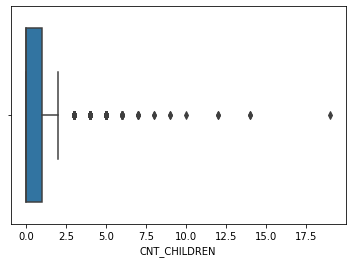

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


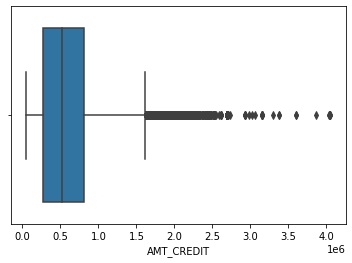

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


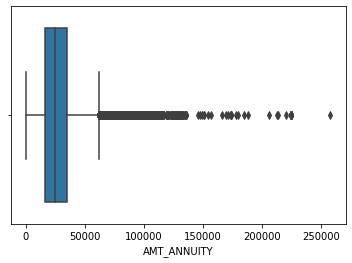

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


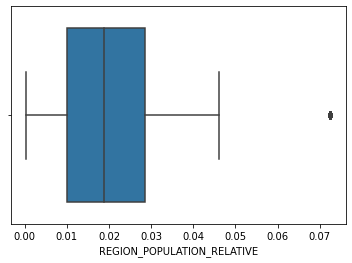

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


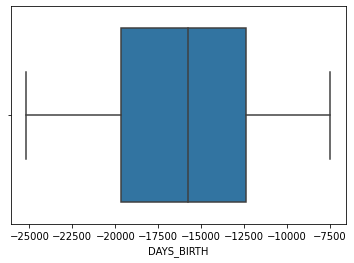

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


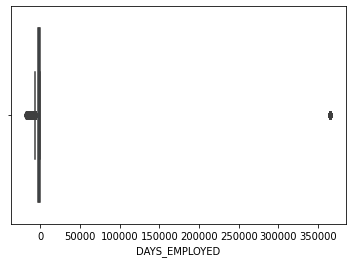

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


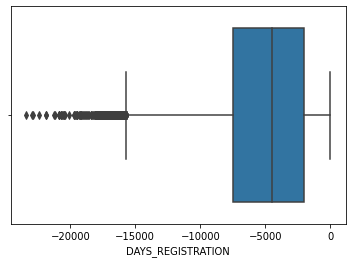

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


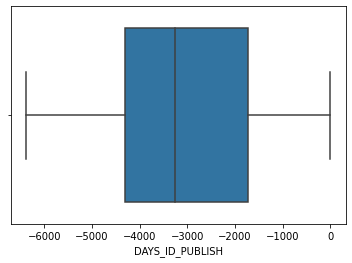

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


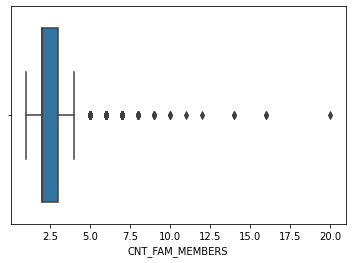

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


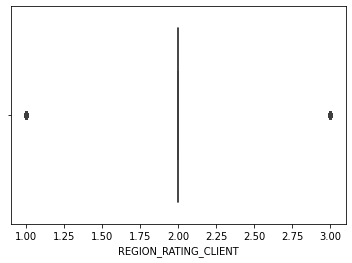

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


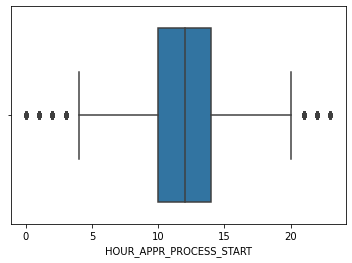

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


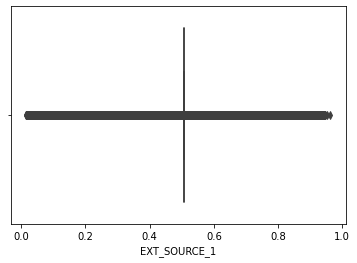

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


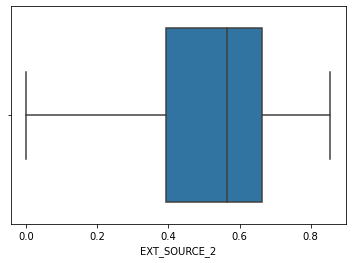

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


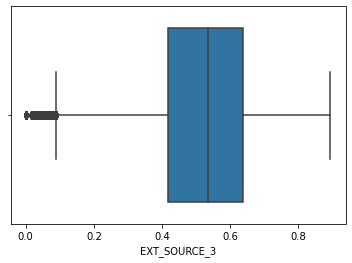

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


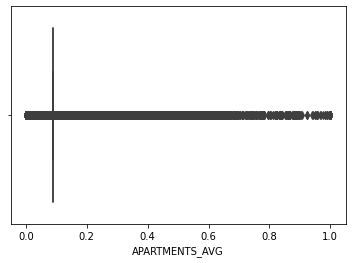

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


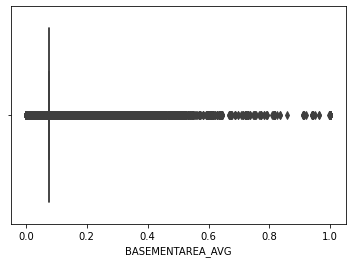

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


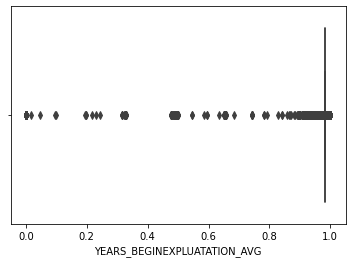

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


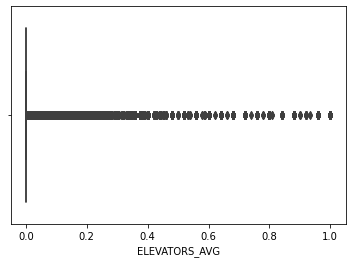

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


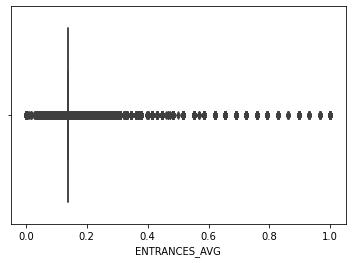

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


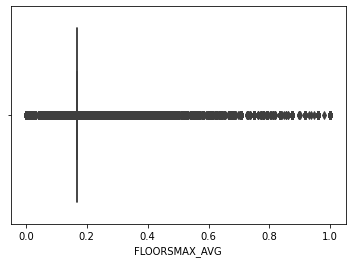

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


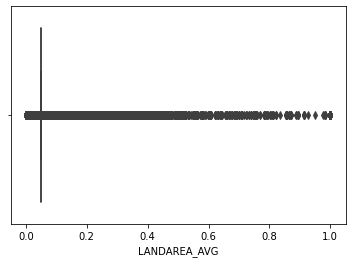

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


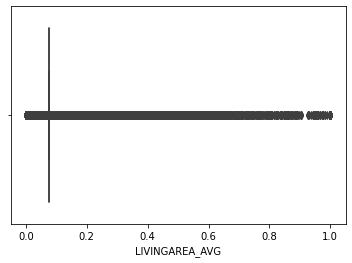

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


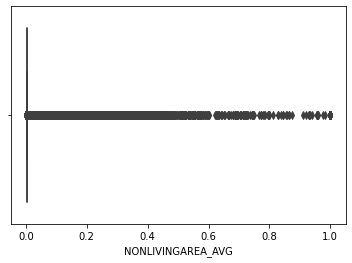

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


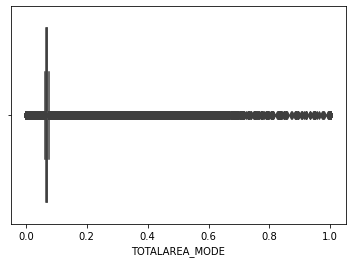

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


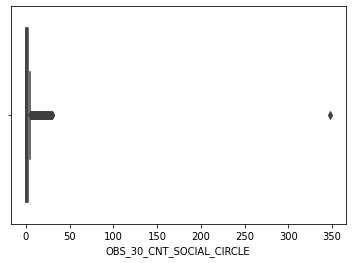

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


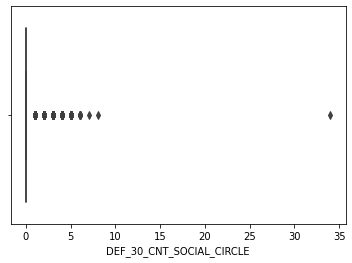

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


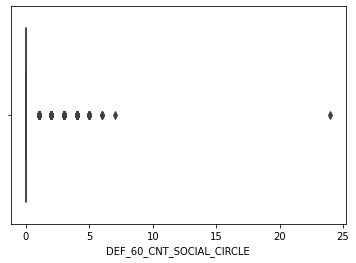

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


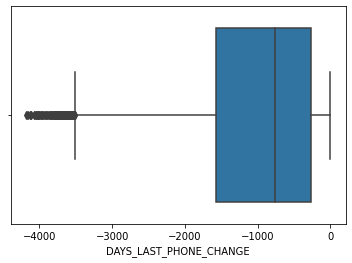

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


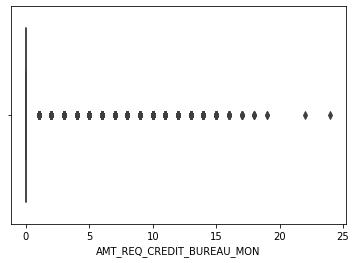

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


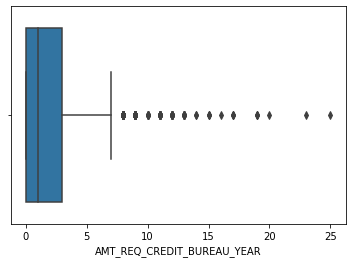

In [57]:
for i in train:
    if (train[i].nunique()>2 and train[i].dtypes != 'object'):
      sns.boxplot(train[i])
      plt.show()

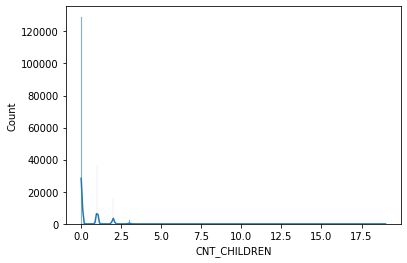

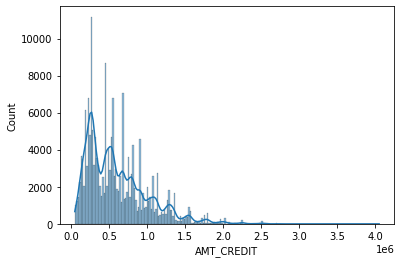

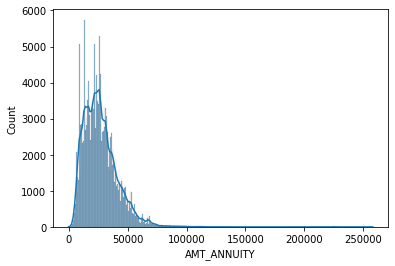

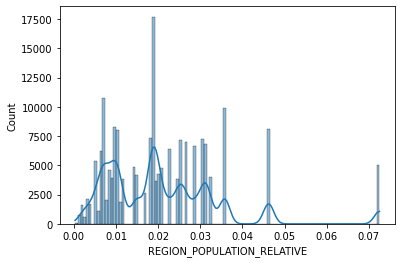

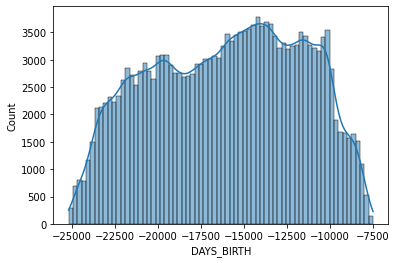

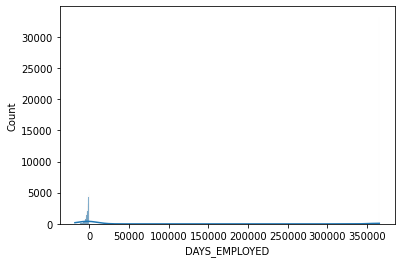

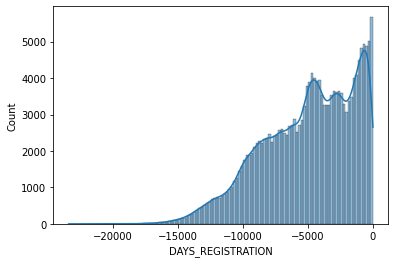

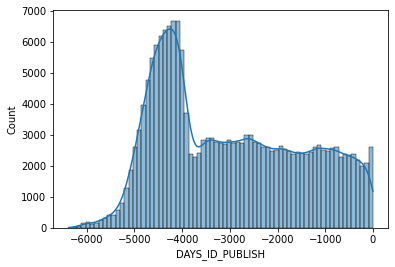

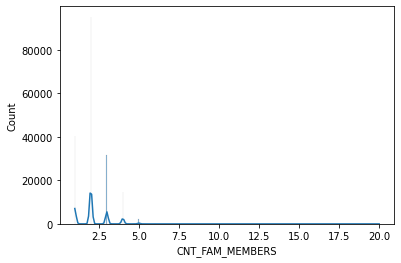

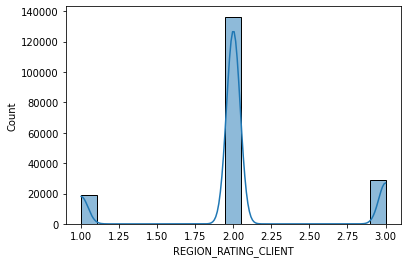

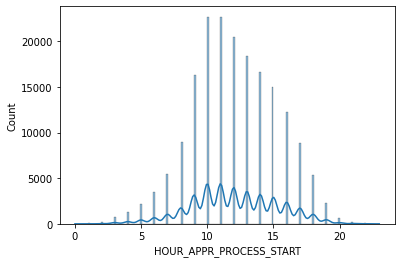

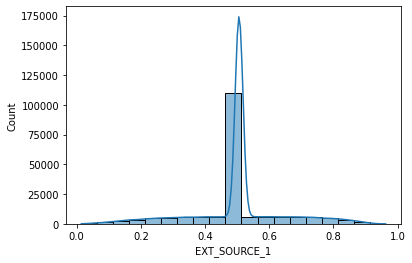

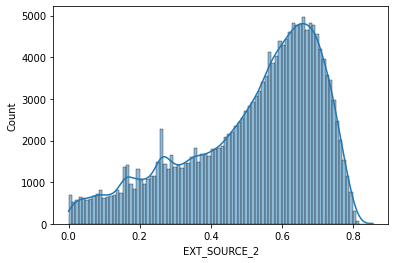

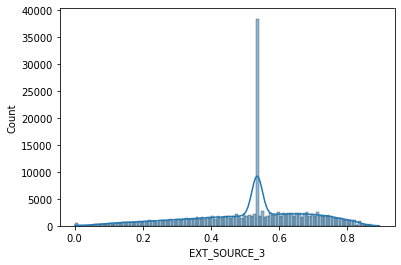

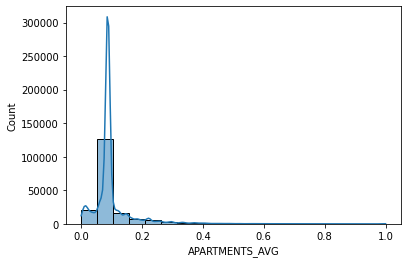

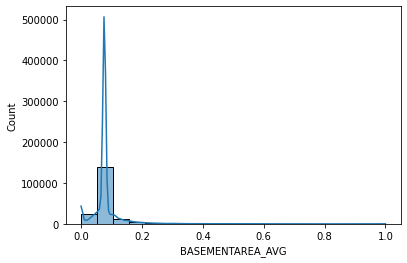

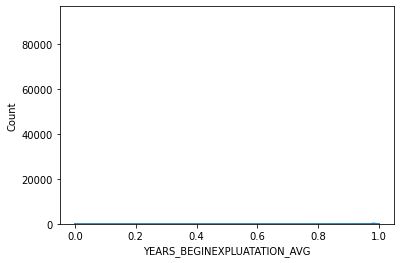

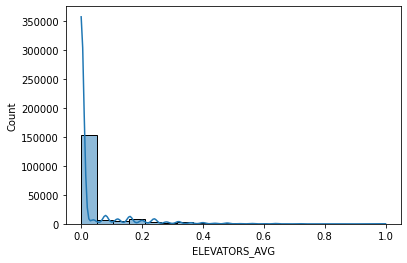

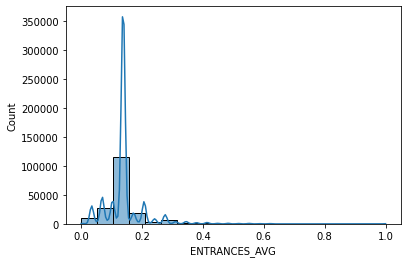

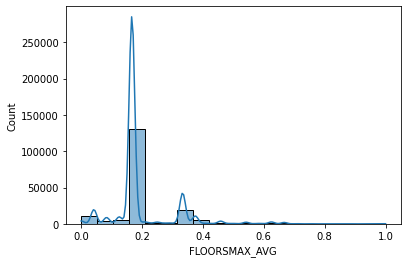

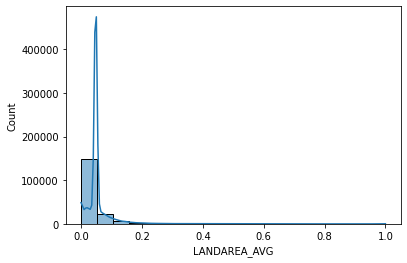

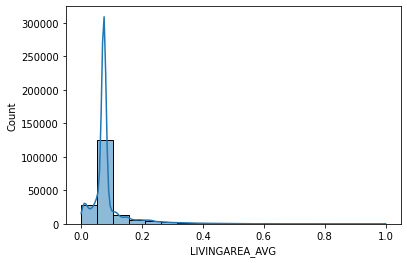

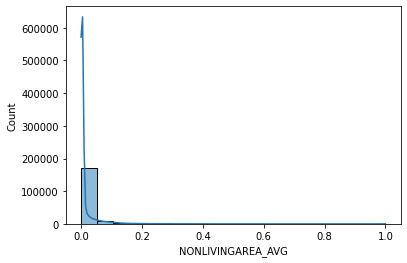

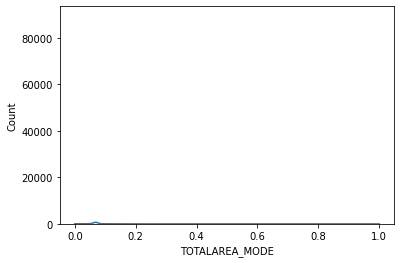

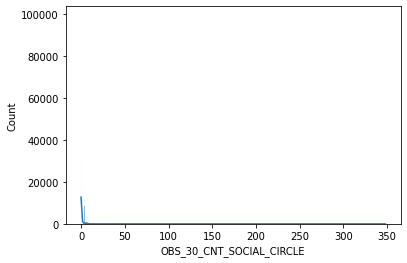

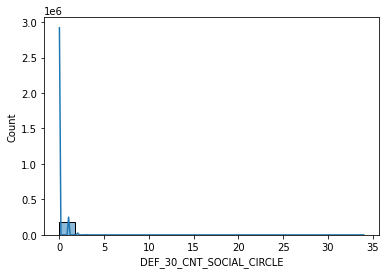

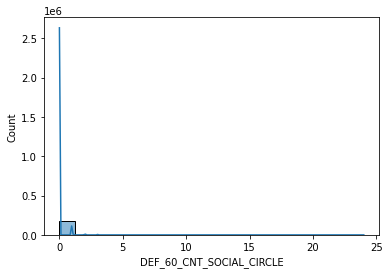

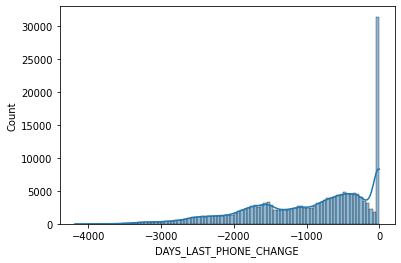

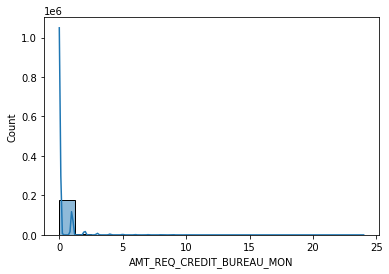

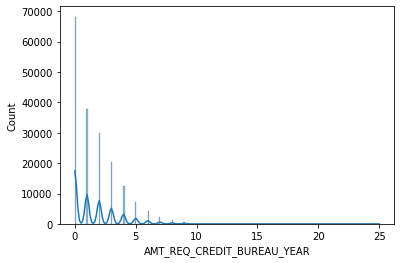

In [58]:
for i in train:
    if (train[i].nunique()>2 and train[i].dtypes != 'object'):
      sns.histplot(train[i],kde=True)
      plt.show()

In [59]:
def calc_iqr(x,para):
    q1 = x.quantile(q=0.25)
    q3 = x.quantile(q=0.75)
    iqr = q3 - q1
    outlier_range = iqr*para
    lower_bound = q1 - outlier_range
    upper_bound = q3 + outlier_range
    return lower_bound,upper_bound

In [60]:
# z = np.abs(stats.zscore(train))

In [61]:
# test['AMT_REQ_CREDIT_BUREAU_YEAR'].value_counts().sort_values()

In [62]:
# len(np.where(train['AMT_REQ_CREDIT_BUREAU_YEAR']>12)[0])

In [63]:
extreme_outliers=['OBS_30_CNT_SOCIAL_CIRCLE','DEF_30_CNT_SOCIAL_CIRCLE','DEF_60_CNT_SOCIAL_CIRCLE','CNT_FAM_MEMBERS']

In [64]:
outliers=['CNT_CHILDREN','AMT_CREDIT','AMT_ANNUITY','REGION_POPULATION_RELATIVE','AMT_REQ_CREDIT_BUREAU_YEAR']

In [65]:
for i in extreme_outliers:
        minv,maxv=calc_iqr(test_train_merged[i],3)
        train[i].loc[train[i].astype('float64') > maxv]  = maxv
        train[i].loc[train[i].astype('float64') < minv]  = minv
        #train.drop(train[train[i].astype('float64')>maxv].index , inplace=True)
        #train.drop(train[train[i].astype('float64')<minv].index , inplace=True)

/usr/local/lib/python3.8/dist-packages/pandas/core/indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


In [66]:
# len(np.where(train['DAYS_EMPLOYED']>0)[0])

In [67]:
for i in outliers:
     minv,maxv=calc_iqr(test_train_merged[i],1.5)
     train[i].loc[train[i].astype('float64') > maxv]  = maxv
     train[i].loc[train[i].astype('float64') < minv]  = minv
     #train.drop(train[train[i].astype('float64')>maxv].index , inplace=True)
     #train.drop(train[train[i].astype('float64')<minv].index , inplace=True)

In [68]:
# len(np.where(train['DAYS_EMPLOYED']>0)[0])

In [69]:
# for i in outliers_manual:
#   if i=='CNT_CHILDREN':
#     train[i].loc[train[i].astype('float64') > 3]  = 3
#     #train.drop(train[train[i].astype('float64')>3].index , inplace=True)

PLOTS AFTER REMOVING OUTLIERS

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


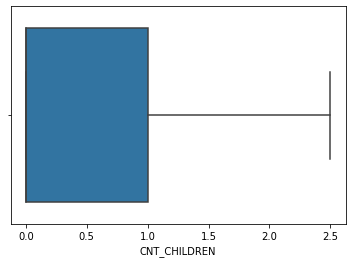

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


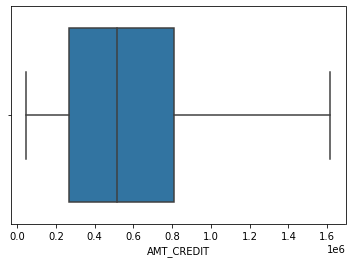

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


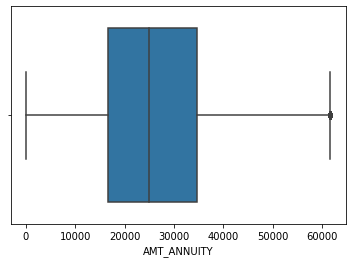

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


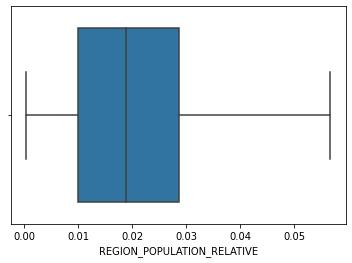

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


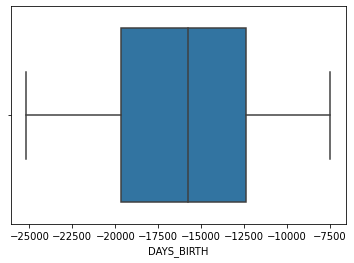

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


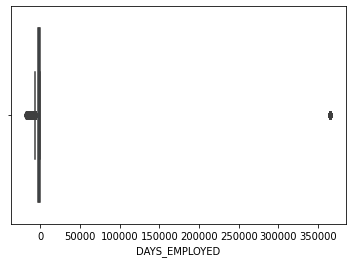

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


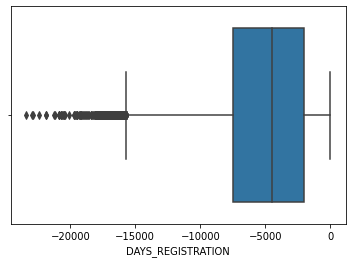

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


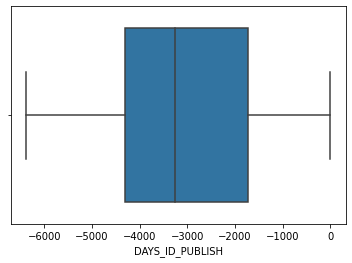

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


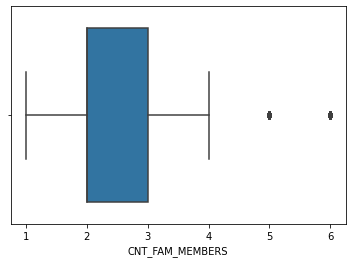

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


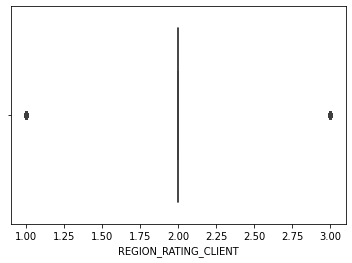

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


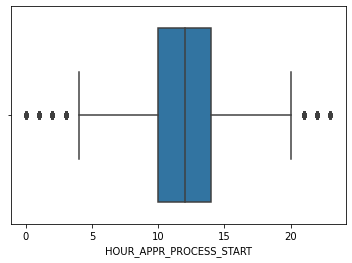

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


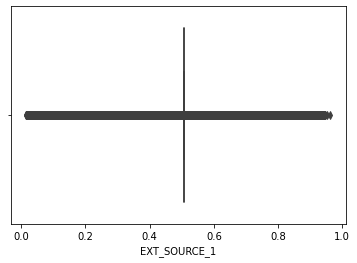

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


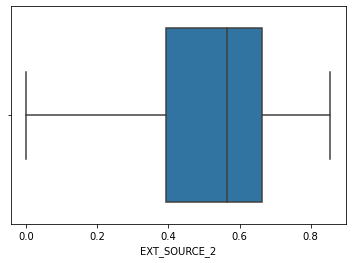

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


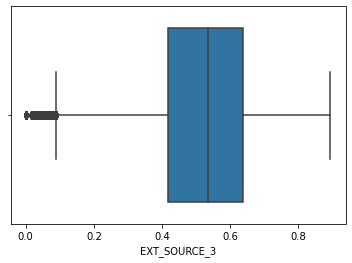

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


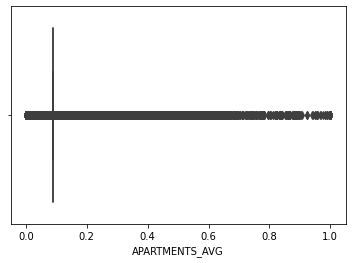

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


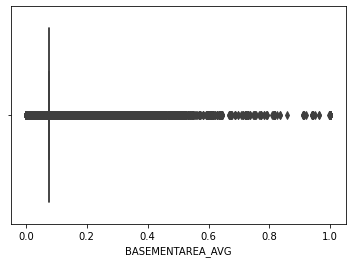

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


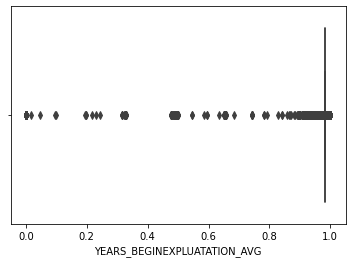

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


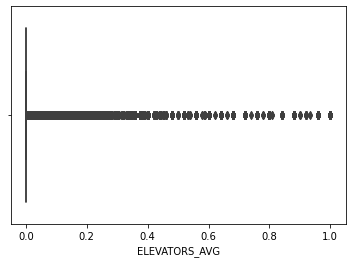

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


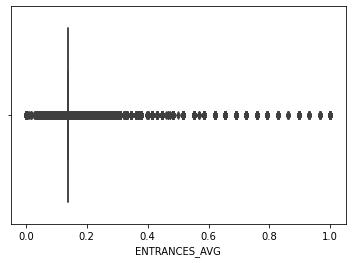

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


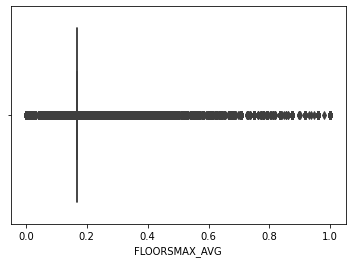

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


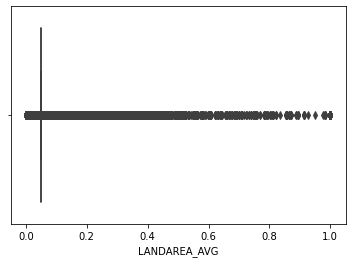

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


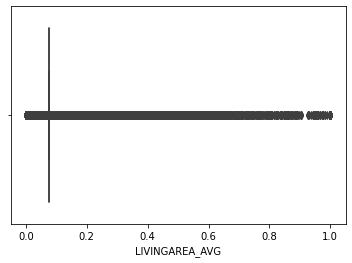

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


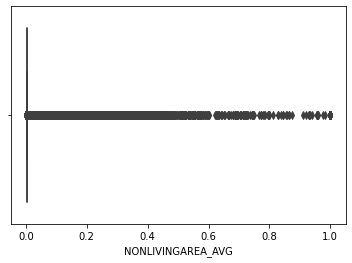

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


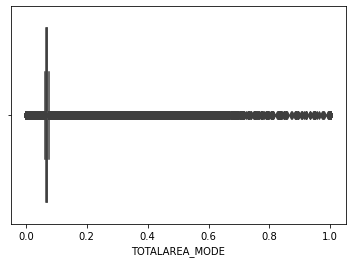

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


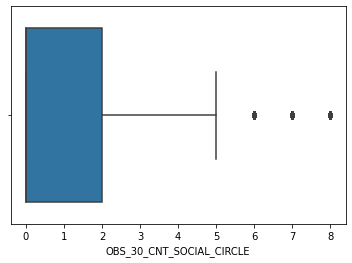

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


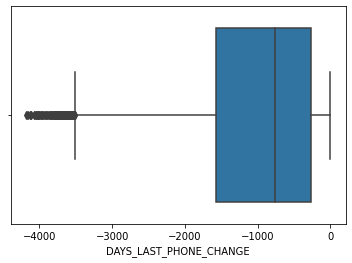

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


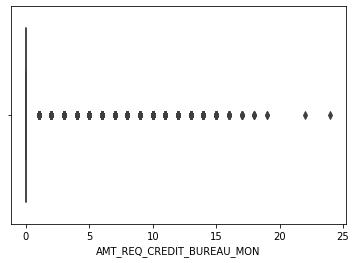

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


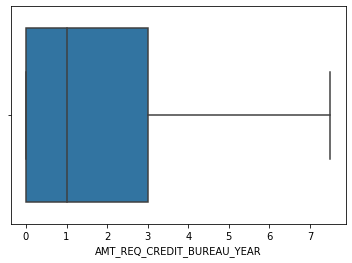

In [70]:
for i in train:
  if (train[i].nunique()>2 and train[i].dtypes != 'object'):
      sns.boxplot(train[i])
      plt.show()

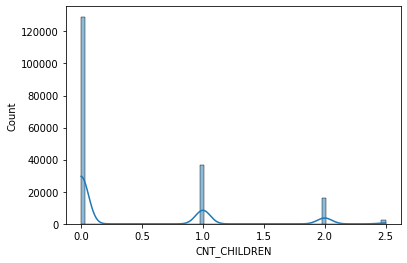

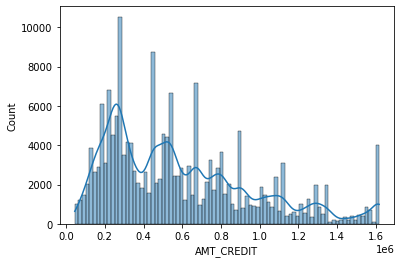

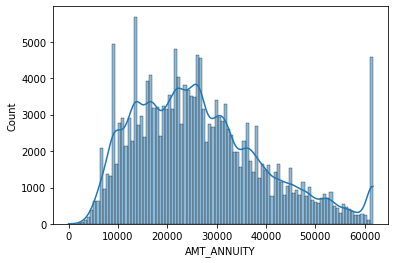

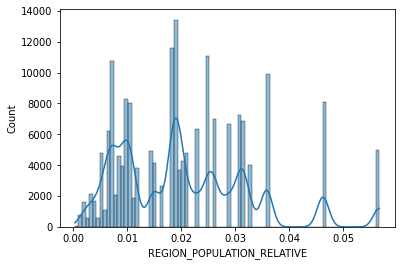

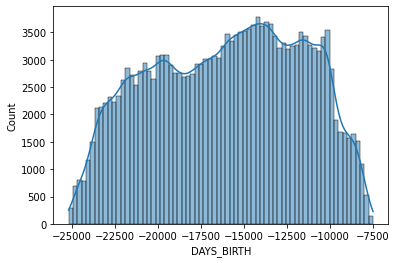

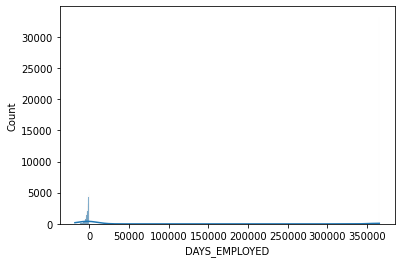

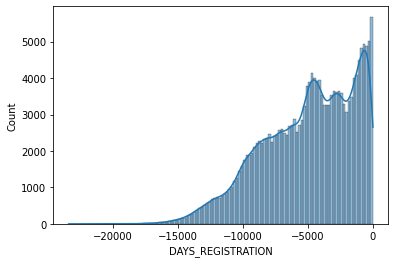

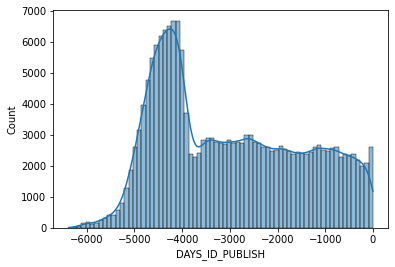

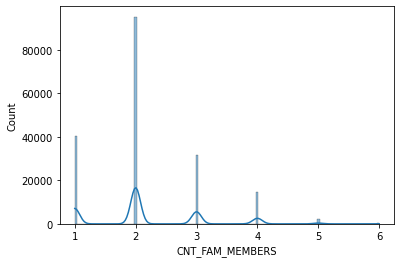

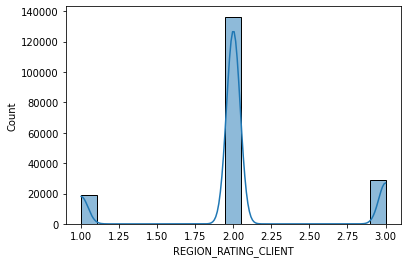

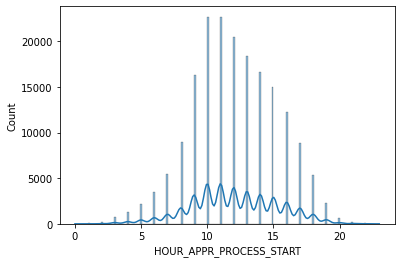

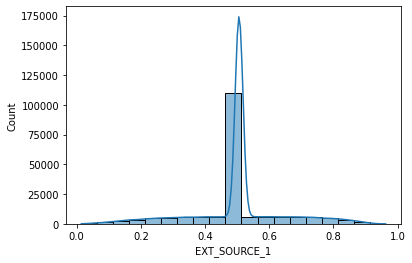

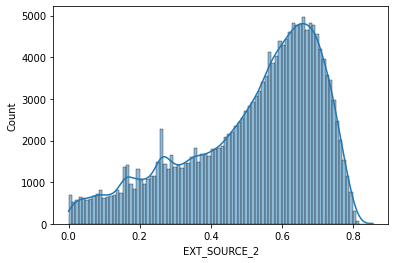

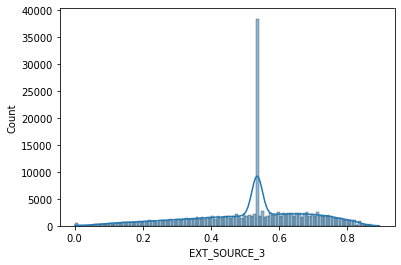

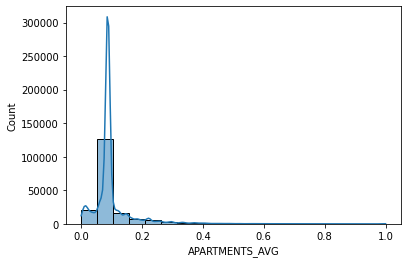

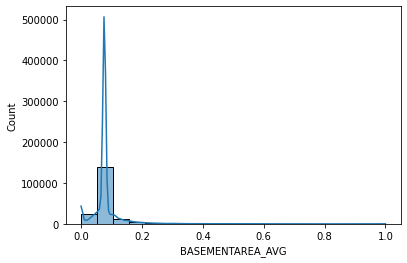

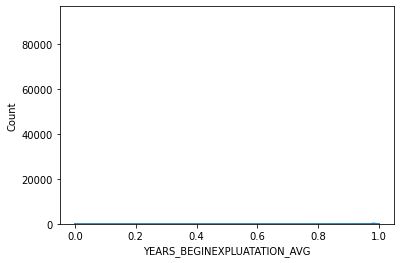

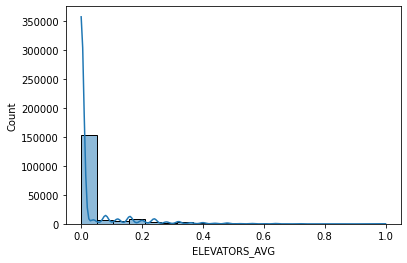

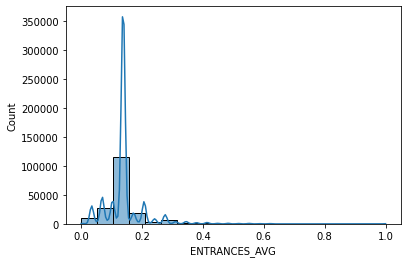

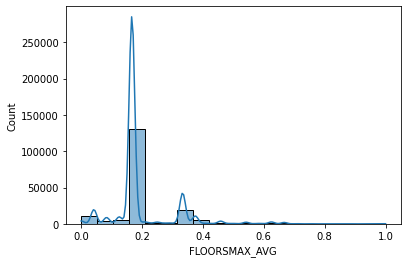

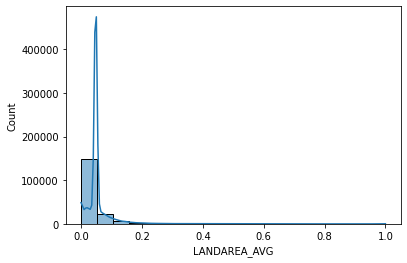

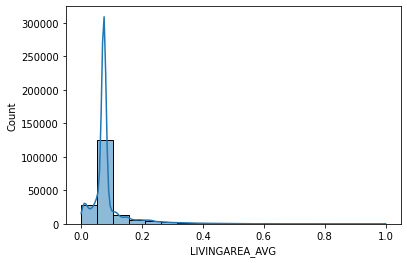

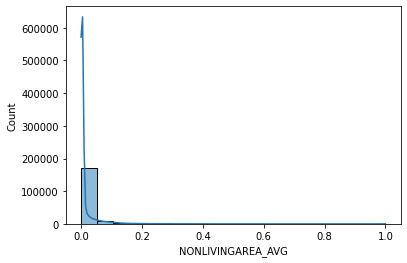

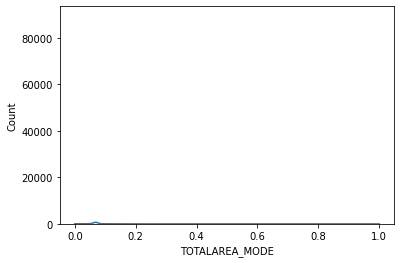

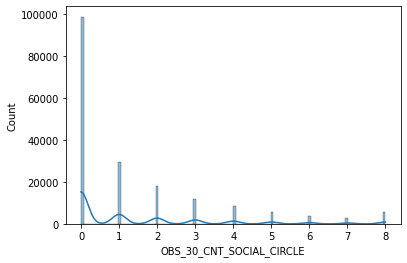

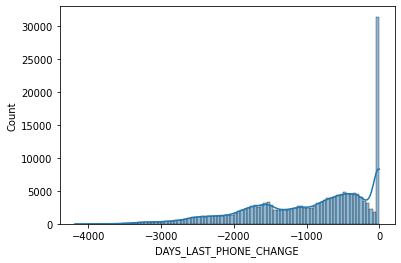

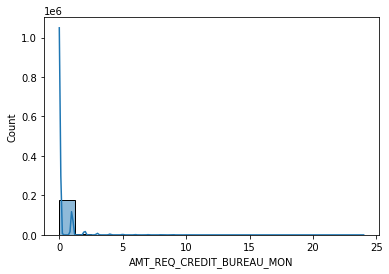

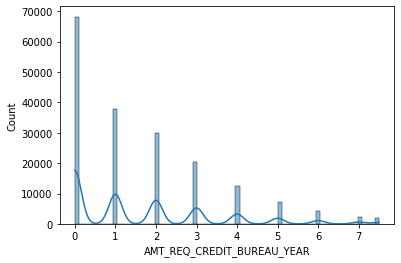

In [71]:
for i in train:
  if (train[i].nunique()>2 and train[i].dtypes != 'object'):
      sns.histplot(train[i],kde=True)
      plt.show()

#**ENCODING**

**TRAIN DATA**

In [72]:
obj_train = [i for i in train.columns if train[i].dtypes == 'object']
obj_train

['NAME_CONTRACT_TYPE',
 'CODE_GENDER',
 'FLAG_OWN_CAR',
 'FLAG_OWN_REALTY',
 'NAME_TYPE_SUITE',
 'NAME_INCOME_TYPE',
 'NAME_EDUCATION_TYPE',
 'NAME_FAMILY_STATUS',
 'NAME_HOUSING_TYPE',
 'OCCUPATION_TYPE',
 'WEEKDAY_APPR_PROCESS_START',
 'ORGANIZATION_TYPE',
 'HOUSETYPE_MODE',
 'WALLSMATERIAL_MODE',
 'EMERGENCYSTATE_MODE']

In [73]:
label_train=obj_train

In [74]:
train['NAME_CONTRACT_TYPE'].value_counts()

Cash loans         167013
Revolving loans     17493
Name: NAME_CONTRACT_TYPE, dtype: int64

In [75]:
train['FLAG_OWN_CAR'].value_counts()

N    121630
Y     62876
Name: FLAG_OWN_CAR, dtype: int64

In [76]:
train['FLAG_OWN_REALTY'].value_counts()

Y    128059
N     56447
Name: FLAG_OWN_REALTY, dtype: int64

In [77]:
from sklearn.preprocessing import LabelEncoder

labelencoder = LabelEncoder()
for i in label_train:
    train[i] = labelencoder.fit_transform(train[i])

In [78]:
train['NAME_CONTRACT_TYPE'].value_counts()

0    167013
1     17493
Name: NAME_CONTRACT_TYPE, dtype: int64

In [79]:
train['FLAG_OWN_CAR'].value_counts()

0    121630
1     62876
Name: FLAG_OWN_CAR, dtype: int64

In [80]:
train['FLAG_OWN_REALTY'].value_counts()

1    128059
0     56447
Name: FLAG_OWN_REALTY, dtype: int64

**TEST DATA**

In [81]:
test['NAME_CONTRACT_TYPE'].value_counts()

Cash loans         111219
Revolving loans     11786
Name: NAME_CONTRACT_TYPE, dtype: int64

In [82]:
for i in label_train:
    test[i] = labelencoder.fit_transform(test[i])

In [83]:
test['NAME_CONTRACT_TYPE'].value_counts()

0    111219
1     11786
Name: NAME_CONTRACT_TYPE, dtype: int64

#**STANDARDISATION**

In [84]:
# from sklearn.preprocessing import StandardScaler
# sc = StandardScaler()
# x_train = sc.fit_transform(x_train)
# x_validation = sc.transform (x_validation)

#Standardisation reduced F1 score for some reason so commented it out

#**MODEL IMPLEMENTATION**

**IMPORTING LIBRARIES**

In [85]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from xgboost import XGBClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn import svm
from lightgbm import LGBMClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.linear_model import Perceptron

from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score

In [86]:
x=train.drop(['TARGET'],axis=1)

y=train['TARGET']

In [87]:
x_train, x_validation, y_train, y_validation = train_test_split(x,y,test_size=0.2,random_state=42)

#**TRIAL MODELS**

All of it is commented out as their scores were pretty less with default parameters compared to XGB and LGBM

**LOGISTIC REGRESSION**

In [88]:
# lr = LogisticRegression(max_iter=3000)
# lr.fit(x_train, y_train)

# y_pred_lr = lr.predict(x_validation)

# lr_train_score = lr.score(x_train, y_train)
# lr_validation_score= lr.score(x_validation, y_validation)

# lr_acc = accuracy_score(y_pred_lr,y_validation)
# lr_f1_score=f1_score(y_validation, y_pred_lr, average='macro')

# pred_lr=lr.predict(test)
# pred_lr

In [89]:
# print('LogisticRegressionModel Train Score is : ' , lr_train_score)
# print('LogisticRegressionModel Validation Score is : ' , lr_validation_score)
# print('LogisticRegressionModel Accuracy is : ', lr_acc)
# print('LogisticRegressionModel F1 Score is : ', lr_f1_score)

**DECISION TREES**

In [90]:
# dt= DecisionTreeClassifier()
# dt.fit(x_train, y_train)

# y_pred_dt = dt.predict(x_validation)

# dt_train_score = dt.score(x_train, y_train)
# dt_validation_score= dt.score(x_validation, y_validation)

# dt_acc = accuracy_score(y_pred_dt,y_validation)
# dt_f1_score=f1_score(y_validation, y_pred_dt, average='macro')

# pred_dt=dt.predict(test)
# pred_dt

In [91]:
# print('DecisionTreeClassifier Train Score is : ' , dt_train_score)
# print('DecisionTreeClassifier Validation Score is : ' , dt_validation_score)
# print('DecisionTreeClassifier Accuracy is : ', dt_acc)
# print('DecisionTreeClassifier F1 Score is : ', dt_f1_score)

**RANDOM FOREST**

In [92]:
# rf= RandomForestClassifier(n_estimators = 100, random_state = 50, verbose = 1, n_jobs = -1)
# rf.fit(x_train, y_train)

# y_pred_rf = rf.predict(x_validation)

# rf_train_score = rf.score(x_train, y_train)
# rf_validation_score= rf.score(x_validation, y_validation)

# rf_acc = accuracy_score(y_pred_rf,y_validation)
# rf_f1_score=f1_score(y_validation, y_pred_rf, average='macro')

# pred_rf=rf.predict(test)
# pred_rf

In [93]:
# print('RandomForestClassifier Train Score is : ' , rf_train_score)
# print('RandomForestClassifier Validation Score is : ' , rf_validation_score)
# print('RandomForestClassifier Accuracy is : ', rf_acc)
# print('RandomForestClassifier F1 Score is : ', rf_f1_score)

**NAIVE BAYES**

In [94]:
# nb = GaussianNB()
# nb.fit(x_train, y_train)

# y_pred_nb = nb.predict(x_validation)

# nb_train_score = nb.score(x_train, y_train)
# nb_validation_score= nb.score(x_validation, y_validation)

# nb_acc = accuracy_score(y_pred_nb,y_validation)
# nb_f1_score=f1_score(y_validation, y_pred_nb, average='macro')

# pred_nb=nb.predict(test)
# pred_nb

In [95]:
# print('NaiveBayesClassifier Train Score is : ' , nb_train_score)
# print('NaiveBayesClassifier Validation Score is : ' , nb_validation_score)
# print('NaiveBayesClassifier Accuracy is : ', nb_acc)
# print('NaiveBayesClassifier F1 Score is : ', nb_f1_score)

**ADABOOST**

In [96]:
# adb = AdaBoostClassifier(random_state=0,n_estimators=200)

# adb.fit(x_train, y_train)

# y_pred_adb = adb.predict(x_validation)

# adb_train_score = adb.score(x_train, y_train)
# adb_validation_score= adb.score(x_validation, y_validation)

# adb_acc = accuracy_score(y_pred_adb,y_validation)
# adb_f1_score=f1_score(y_validation, y_pred_adb, average='macro')

# pred_adb=adb.predict(test)
# pred_adb

In [97]:
# print('AdaBoostClassifier Train Score is : ' , adb_train_score)
# print('AdaBoostClassifier Validation Score is : ' , adb_validation_score)
# print('AdaBoostClassifier Accuracy is : ', adb_acc)
# print('AdaBoostClassifier F1 Score is : ', adb_f1_score)

**GRADIENT BOOST**

In [98]:
# gb = GradientBoostingClassifier(random_state=0,learning_rate= 0.01,n_estimators= 1000,max_depth=6)

# gb.fit(x_train, y_train)

# y_pred_gb = gb.predict(x_validation)

# gb_train_score = gb.score(x_train, y_train)
# gb_validation_score= gb.score(x_validation, y_validation)

# gb_acc = accuracy_score(y_pred_gb,y_validation)
# gb_f1_score=f1_score(y_validation, y_pred_gb, average='macro')

# pred_gb=gb.predict(test)
# pred_gb

In [99]:
# print('GradientBoostingClassifier Train Score is : ' , gb_train_score)
# print('GradientBoostingClassifier Validation Score is : ' , gb_validation_score)
# print('GradientBoostingClassifier Accuracy is : ', gb_acc)
# print('GradientBoostingClassifier F1 Score is : ', gb_f1_score)

**SVM**

In [100]:
# from sklearn.svm import SVC
# svc = SVC(C=1.0, random_state=1, kernel='linear')
# svc.fit(x_train, y_train)

# y_pred_svc = svc.predict(x_validation)

# svc_train_score = svc.score(x_train, y_train)
# svc_validation_score= svc.score(x_validation, y_validation)

# svc_acc = accuracy_score(y_pred_svc,y_validation)
# svc_f1_score=f1_score(y_validation, y_pred_svc, average='macro')

# pred_svc=svc.predict(test)
# pred_svc

In [101]:
# print('SupportVectorMachineClassifier Train Score is : ' , svc_train_score)
# print('SupportVectorMachineClassifier Validation Score is : ' , svc_validation_score)
# print('SupportVectorMachineClassifier Accuracy is : ', svc_acc)
# print('SupportVectorMachineClassifier F1 Score is : ', svc_f1_score)

**CATBOOST**

In [102]:
# cb = CatBoostClassifier(thread_count=-1,random_state=0,border_count=5000,depth=4)
# cb.fit(x_train, y_train)

# y_pred_cb = cb.predict(x_validation)

# cb_train_score = cb.score(x_train, y_train)
# cb_validation_score= cb.score(x_validation, y_validation)

# cb_acc = accuracy_score(y_pred_cb,y_validation)
# cb_f1_score=f1_score(y_validation, y_pred_cb, average='macro')

# pred_cb=svc.predict(test)
# pred_cb

In [103]:
# print('CatBoostClassifier Train Score is : ' , cb_train_score)
# print('CatBoostClassifier Validation Score is : ' , cb_validation_score)
# print('CatBoostClassifier Accuracy is : ', cb_acc)
# print('CatBoostClassifier F1 Score is : ', cb_f1_score)

**PERCEPTRON**

In [104]:
# perc = Perceptron(random_state=1)
# perc.fit(x_train, y_train)

# y_pred_perc = perc.predict(x_validation)

# perc_train_score = perc.score(x_train, y_train)
# perc_validation_score= perc.score(x_validation, y_validation)

# perc_acc = accuracy_score(y_pred_perc,y_validation)
# perc_f1_score=f1_score(y_validation, y_pred_perc, average='macro')

# pred_perc=perc.predict(test)
# pred_perc

In [105]:
# print('PerceptronClassifier Train Score is : ' , perc_train_score)
# print('PerceptronClassifier Validation Score is : ' , perc_validation_score)
# print('PerceptronClassifier Accuracy is : ', perc_acc)
# print('PerceptronClassifier F1 Score is : ', perc_f1_score)

#**FINAL MODELS**

**XGBOOST**

Tuning Optimal Parameters

In [106]:
# params={
#  "learning_rate"    : [0.2] ,
#  "max_depth"        : [4],
#  "min_child_weight" : [12,13,14,15],
#  "gamma"            : [0.2],
#  "colsample_bytree" : [0.7],
#  "scale_pos_weight" : [5],
#  "subsample"        : [0.65,0.7,0.75,0.8,0.9,0.85]
# }

In [107]:
# from sklearn.model_selection import RandomizedSearchCV, GridSearchCV

# def timer(start_time=None):
#     if not start_time:
#         start_time = datetime.now()
#         return start_time
#     elif start_time:
#         thour, temp_sec = divmod((datetime.now() - start_time).total_seconds(), 3600)
#         tmin, tsec = divmod(temp_sec, 60)
#         print('\n Time taken: %i hours %i minutes and %s seconds.' % (thour, tmin, round(tsec, 2)))

# xgb=XGBClassifier()
# random_search=RandomizedSearchCV(xgb,param_distributions=params,n_iter=5,scoring='roc_auc',n_jobs=-1,cv=5,verbose=3)

In [108]:
# from datetime import datetime
# start_time = timer(None) # timing starts from this point for "start_time" variable
# random_search.fit(x,y)
# timer(start_time) # timing ends here for "start_time" variable

In [109]:
# random_search.best_estimator_

In [110]:
# random_search.best_params_

Implementation:

In [111]:
xgb = XGBClassifier(
    scale_pos_weight=5,
    max_depth = 4,
    min_child_weight = 12,
    gamma = 0.2,
    subsample=0.9, 
    colsample_bytree = 0.7,
    learning_rate=0.2,
    n_estimaters=10000,
    objective= 'binary:logistic'
    )
xgb.fit(x_train, y_train)

y_pred_xgb1 = xgb.predict(x_validation)
y_pred_xgb = [round(value) for value in y_pred_xgb1]

y_pred_xgb = xgb.predict(x_validation)

xgb_train_score = xgb.score(x_train, y_train)
xgb_validation_score= xgb.score(x_validation, y_validation)

xgb_acc = accuracy_score(y_pred_xgb,y_validation)
xgb_f1_score=f1_score(y_validation, y_pred_xgb, average='macro')

pred_xgb=xgb.predict(test)
pred_xgb

array([0, 0, 0, ..., 0, 0, 0])

In [112]:
print('XGBClassifier Train Score is : ' , xgb_train_score)
print('XGBClassifier Test Score is : ' , xgb_validation_score)
print('XGBClassifier Accuracy is : ', xgb_acc)
print('XGBClassifier F1 Score is : ', xgb_f1_score)

XGBClassifier Train Score is :  0.8725170049592152
XGBClassifier Test Score is :  0.8681914259389735
XGBClassifier Accuracy is :  0.8681914259389735
XGBClassifier F1 Score is :  0.6139927344718399


**LIGHT GBM**

Tuning Optimal Parameters

In [113]:
# from lightgbm import LGBMRegressor
# import numpy as np
# import pandas as pd
# from sklearn.model_selection import KFold
# from sklearn.metrics import mean_squared_error
# from sklearn.preprocessing import LabelEncoder
# from sklearn.model_selection import train_test_split

In [114]:
# def objective(trial,data=x,target=y):
    
#     train_x, test_x, train_y, test_y = train_test_split(data, target, test_size=0.2,random_state=42)
#     # param = {
#     #     'metric': 'rmse', 
#     #     'random_state': 48,
#     #     'n_estimators': 20000,
#     #     'reg_alpha': trial.suggest_loguniform('reg_alpha', 1e-3, 10.0),
#     #     'reg_lambda': trial.suggest_loguniform('reg_lambda', 1e-3, 10.0),
#     #     'colsample_bytree': trial.suggest_categorical('colsample_bytree', [0.3,0.4,0.5,0.6,0.7,0.8,0.9, 1.0]),
#     #     'subsample': trial.suggest_categorical('subsample', [0.4,0.5,0.6,0.7,0.8,1.0]),
#     #     'learning_rate': trial.suggest_categorical('learning_rate', [0.006,0.008,0.01,0.014,0.017,0.02]),
#     #     'max_depth': trial.suggest_categorical('max_depth', [10,20,100]),
#     #     'num_leaves' : trial.suggest_int('num_leaves', 1, 1000),
#     #     'min_child_samples': trial.suggest_int('min_child_samples', 1, 300),
#     #     'cat_smooth' : trial.suggest_int('min_data_per_groups', 1, 100)
#     # }
#     param = {
#         'metric': 'rmse', 
#         'random_state': 48,
#         'n_estimators': 10000,
#         'reg_alpha': 1.751849103761535,
#         'reg_lambda': 0.06277933961586747,
#         'colsample_bytree': 0.7,
#         'subsample': trial.suggest_categorical('subsample', [0.6,0.65,0.9]),
#         'learning_rate': 0.008,
#         'max_depth': trial.suggest_categorical('max_depth', [9,10]),
#         'num_leaves' : trial.suggest_int('num_leaves', 1, 1024),
#     }
#     model = LGBMRegressor(**param)  
    
#     model.fit(train_x,train_y,eval_set=[(test_x,test_y)],early_stopping_rounds=100,verbose=False)
    
#     preds = model.predict(test_x)
    
#     rmse = mean_squared_error(test_y, preds,squared=False)
    
#     return rmse

In [115]:
# #pip install optuna
# import optuna

In [116]:
# study = optuna.create_study(direction='minimize')
# study.optimize(objective, n_trials=15) 
# print('Number of finished trials:', len(study.trials))
# print('Best trial:', study.best_trial.params)

Final Implementation

In [117]:
lgbm = LGBMClassifier(
       verbosity = -1,
       feature_pre_filter = False,
       reg_lambda=1.751849103761535,
       reg_alpha=0.06277933961586747,
       num_leaves= 52,
       max_depth=10,
       min_child_samples= 110,
       learning_rate= 0.008,
       n_estimators= 10000,
       scale_pos_weight=5,
       objective='binary',
       metrics='auc',
       colsample_bytree=0.7,
       subsample=0.6,
       )


lgbm.fit(x_train, y_train)

y_pred_lgbm = lgbm.predict(x_validation)

lgbm_train_score = lgbm.score(x_train, y_train)
lgbm_validation_score= lgbm.score(x_validation, y_validation)

lgbm_acc = accuracy_score(y_pred_lgbm,y_validation)
lgbm_f1_score=f1_score(y_validation, y_pred_lgbm, average='macro')

pred_lgbm=lgbm.predict(test)
pred_lgbm

array([0, 0, 0, ..., 0, 0, 0])

In [118]:
print('LGBMClassifier Train Score is : ' , lgbm_train_score)
print('LGBMClassifier Test Score is : ' , lgbm_validation_score)
print('LGBMClassifier Accuracy is : ', lgbm_acc)
print('LGBMClassifier F1 Score is : ', lgbm_f1_score)

LGBMClassifier Train Score is :  0.9597504132679331
LGBMClassifier Test Score is :  0.8913880006503713
LGBMClassifier Accuracy is :  0.8913880006503713
LGBMClassifier F1 Score is :  0.6064285284799208


#**SUMMARY**

In [119]:
data = {'Models':['Light GBM', 'XGB' ],
        'Accuracy Score':[lgbm_acc,xgb_acc],
        'F1 Score':[lgbm_f1_score,xgb_f1_score]}
compare=df = pd.DataFrame(data)
compare.sort_values(ascending= False , by = ['F1 Score'])

Models  Accuracy Score  F1 Score
1        XGB        0.868191  0.613993
0  Light GBM        0.891388  0.606429

In [120]:
# LR_Final = pd.DataFrame({ 'SK_ID_CURR': test_data['SK_ID_CURR'],'TARGET': pred_lr })
# RF_Final = pd.DataFrame({ 'SK_ID_CURR': test_data['SK_ID_CURR'],'TARGET': pred_rf })
# NB_Final = pd.DataFrame({ 'SK_ID_CURR': test_data['SK_ID_CURR'],'TARGET': pred_nb })
# GB_Final = pd.DataFrame({ 'SK_ID_CURR': test_data['SK_ID_CURR'],'TARGET': pred_gb })
# SVC_Final = pd.DataFrame({ 'SK_ID_CURR': test_data['SK_ID_CURR'],'TARGET': pred_svc })
# ADB_Final = pd.DataFrame({ 'SK_ID_CURR': test_data['SK_ID_CURR'],'TARGET': pred_adb })
# PERC_Final = pd.DataFrame({ 'SK_ID_CURR': test_data['SK_ID_CURR'],'TARGET': pred_perc })
# DT_Final = pd.DataFrame({ 'SK_ID_CURR': test_data['SK_ID_CURR'],'TARGET': pred_dt })

In [121]:
XGB_Final= pd.DataFrame({ 'SK_ID_CURR': test_data['SK_ID_CURR'],'TARGET': pred_xgb })
LGBM_Final = pd.DataFrame({ 'SK_ID_CURR': test_data['SK_ID_CURR'],'TARGET': pred_lgbm })

In [122]:
# LR_Final.TARGET.value_counts()

In [123]:
# RF_Final.TARGET.value_counts()

In [124]:
# NB_Final.TARGET.value_counts()

In [125]:
# ADB_Final.TARGET.value_counts()

In [126]:
# DT_Final.TARGET.value_counts()

In [127]:
# GB_Final.TARGET.value_counts()

In [128]:
# SVC_Final.TARGET.value_counts()

In [129]:
# PERC_Final.TARGET.value_counts()

In [130]:
XGB_Final.TARGET.value_counts()

0    109553
1     13452
Name: TARGET, dtype: int64

In [131]:
LGBM_Final.TARGET.value_counts()

0    114566
1      8439
Name: TARGET, dtype: int64

In [132]:
# DT_Final.to_csv("DT_Final.csv", index=False)
# RF_Final.to_csv("RF_Final.csv", index=False)
# NB_Final.to_csv("NB_Final.csv", index=False)
# LR_Final.to_csv("LR_Final.csv", index=False)
# ADB_Final.to_csv("ADB_Final.csv", index=False)
# SVC_Final.to_csv("SVC_Final.csv", index=False)
# PERC_Final.to_csv("PERC_Final.csv", index=False)
# GB_Final.to_csv("GB_Final.csv", index=False)

XGB_Final.to_csv("XGB_Final.csv", index=False)
LGBM_Final.to_csv("LGBM_Final.csv", index=False)